In [2]:
from halka_arz_functions import *

## Collecting Halka arz data.

In [2]:
year_period = 3
start, end = Delta_Time(years=3)
url = 'https://halkarz.com/k/halka-arz/'
print(f"Stard date {start}, end date {end}.")

Stard date 2021-04-16, end date 2024-04-16.


### Collecting name of stocks

In [8]:
start_year = dt.datetime.today().year
year_period = 3
halka_arz_pages = {}
stocks = {}
for i in range(year_period):
    year_page = url+f'{start_year - i}/'
    #halka_arz_pages.update({page : {'Pages':page_urls(page)}})
    pages = page_urls(year_page)
    for page in pages:
        page_soup = make_soup(page)
        stocks_ = page_soup.find_all(class_ = "halka-arz-list archives")
        for stock in stocks_:
            stock_content = stock.find(class_ = 'il-content')
            stock_symbol = stock_content.find(class_ = 'il-bist-kod').get_text(strip=True)
            stock_name = stock_content.find(class_ = 'il-halka-arz-sirket').find('a')['title']
            stock_page = stock_content.find(class_ = 'il-halka-arz-sirket').find('a')['href']
            stocks.update({stock_symbol :
                            {'url':stock_page,
                             'stock_name':stock_name,
                             'release_year':start_year-i}})

### Collecting details for stocks

In [3]:
for stock in stocks:
    stocks[stock].update({'Halka_arz_info': get_halka_arz_info(stocks[stock]['url'])})
    stocks[stock].update({'Halka_arz_result': get_halka_arz_result(stocks[stock]['url'])})

NameError: name 'stocks' is not defined

### Collecting historical data

In [16]:
for stock in stocks:
    print(stock)
    stocks[stock].update({'Hist_data': get_hist_data(stock, start_date=start, end_date=end)})

RGYAS
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['RGYAS.IS']: Exception('%ticker%: No timezone found, symbol may be delisted')



RGYAS DONE BY GOOGLE FINANCE
ENTRA
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['ENTRA.IS']: Exception("%ticker%: Period 'max' is invalid, must be one of ['1d', '5d']")



ENTRA DONE BY GOOGLE FINANCE
ODINE
[*********************100%%**********************]  1 of 1 completed
MOGAN
[*********************100%%**********************]  1 of 1 completed
ARTMS
[*********************100%%**********************]  1 of 1 completed
OBAMS
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['OBAMS.IS']: Exception("%ticker%: Period 'max' is invalid, must be one of ['1d', '5d']")



OBAMS DONE BY GOOGLE FINANCE
ALVES
[*********************100%%**********************]  1 of 1 completed
LMKDC
[*********************100%%**********************]  1 of 1 completed
BORSK
[*********************100%%**********************]  1 of 1 completed
PATEK
[*********************100%%**********************]  1 of 1 completed
AVPGY
[*********************100%%**********************]  1 of 1 completed
MEGMT
[*********************100%%**********************]  1 of 1 completed
KBORU
[*********************100%%**********************]  1 of 1 completed
SURGY
[*********************100%%**********************]  1 of 1 completed
CATES
[*********************100%%**********************]  1 of 1 completed
SKYMD
[*********************100%%**********************]  1 of 1 completed
BEGYO
[*********************100%%**********************]  1 of 1 completed
AGROT
[*********************100%%**********************]  1 of 1 completed
EKOS
[*********************100%%**********************]  1 of 1 comple

### Save data.

In [2]:
with open('stocks.p', 'wb') as handle:
    pickle.dump(stocks, handle, protocol=pickle.HIGHEST_PROTOCOL)

NameError: name 'stocks' is not defined

## Data preparation

In [3]:
with open('stocks.p', 'rb') as handle:
    Stocks_copy = pickle.load(handle)

### Prepating stock info data

In [4]:
halka_arz_info_df = pd.DataFrame()
for stock in Stocks_copy:
    halka_arz_info_df = pd.concat([halka_arz_info_df, Stocks_copy[stock]['Halka_arz_info']], axis=0, join='outer', ignore_index='True')
halka_arz_info_df.head()

Halka Arz Tarihi :   \
0  \n                    17-18-19 Nisan 2024\n   ...   
1  \n                    27-28-29 Mart 2024\n    ...   
2  \n                    13-14-15 Mart 2024\n    ...   
3  \n                    28-29 Şubat - 1 Mart 202...   
4  \n                    27-28 Şubat 2024\n      ...   

  Halka Arz Fiyatı/Aralığı :  Dağıtım Yöntemi :            Pay :   \
0                   135,00 TL    Eşit Dağıtım **   33,357,450 Lot   
1                    10,00 TL       Eşit Dağıtım  369,565,717 Lot   
2                    30,00 TL       Eşit Dağıtım   44,200,000 Lot   
3                    11,33 TL       Eşit Dağıtım  262,635,000 Lot   
4                    25,35 TL    Eşit Dağıtım **   20,000,000 Lot   

  \n               Aracı Kurum : \n                              (Konsorsiyum)\n                              \
0  Ak Yatırım Menkul Değerler A.Ş.\n             ...                                                           
1                                                NaN                                                           
2                                                NaN                                                           
3                                                NaN                                                           
4                                                NaN                                                           

  Bist Kodu :       Pazar :   \
0        RGYAS  Yıldız Pazar   
1        ENTRA  Yıldız Pazar   
2        ODINE  Yıldız Pazar   
3        MOGAN  Yıldız Pazar   
4        ARTMS     Ana Pazar   

  \n               Aracı Kurum : \n                              \
0                                                NaN              
1  Ak Yatırım Menkul Değerler A.Ş.\n             ...              
2  Türkiye Sınai Kalkınma Bankası A.Ş.\n         ...              
3  İş Yatırım Menkul Değerler A.Ş.\n             ...              
4  İnfo Yatırım Menkul Değerler A.Ş.\n           ...              

  Bist İlk İşlem Tarihi :  Fiili Dolaşımdaki Pay :  \
0                      NaN                     NaN   
1             4 Nisan 2024                     NaN   
2             21 Mart 2024          43,534,318 Lot   
3              7 Mart 2024         262,555,096 Lot   
4              4 Mart 2024          19,998,335 Lot   

  Fiili Dolaşımdaki Pay Oranı (%) : Endeks :  Ek Pay :   
0                               NaN       NaN       NaN  
1                               NaN       NaN       NaN  
2                            %39.39       NaN       NaN  
3                            %10.75   BIST500       NaN  
4                            %28.56   BIST500       NaN

In [5]:
# Since there is only pre halka arz info for stock at top of list.
halka_arz_info_df.drop(index=0, inplace=True)
halka_arz_info_df.reset_index(drop=True, inplace=True)

In [6]:
# Fixing time column
halka_arz_info_df["Bist İlk İşlem Tarihi : "] = halka_arz_info_df["Bist İlk İşlem Tarihi : "].apply(fix_time_it)
halka_arz_info_df["Bist İlk İşlem Tarihi : "] = pd.to_datetime(halka_arz_info_df["Bist İlk İşlem Tarihi : "])
halka_arz_info_df.head()

Halka Arz Tarihi :   \
0  \n                    27-28-29 Mart 2024\n    ...   
1  \n                    13-14-15 Mart 2024\n    ...   
2  \n                    28-29 Şubat - 1 Mart 202...   
3  \n                    27-28 Şubat 2024\n      ...   
4  \n                    22-23 Şubat 2024\n      ...   

  Halka Arz Fiyatı/Aralığı :  Dağıtım Yöntemi :            Pay :   \
0                    10,00 TL       Eşit Dağıtım  369,565,717 Lot   
1                    30,00 TL       Eşit Dağıtım   44,200,000 Lot   
2                    11,33 TL       Eşit Dağıtım  262,635,000 Lot   
3                    25,35 TL    Eşit Dağıtım **   20,000,000 Lot   
4                    39,24 TL       Eşit Dağıtım   96,336,345 Lot   

  \n               Aracı Kurum : \n                              (Konsorsiyum)\n                              \
0                                                NaN                                                           
1                                                NaN                                                           
2                                                NaN                                                           
3                                                NaN                                                           
4                                                NaN                                                           

  Bist Kodu :       Pazar :   \
0        ENTRA  Yıldız Pazar   
1        ODINE  Yıldız Pazar   
2        MOGAN  Yıldız Pazar   
3        ARTMS     Ana Pazar   
4        OBAMS  Yıldız Pazar   

  \n               Aracı Kurum : \n                              \
0  Ak Yatırım Menkul Değerler A.Ş.\n             ...              
1  Türkiye Sınai Kalkınma Bankası A.Ş.\n         ...              
2  İş Yatırım Menkul Değerler A.Ş.\n             ...              
3  İnfo Yatırım Menkul Değerler A.Ş.\n           ...              
4  Türkiye Kalkınma ve Yatırım Bankası A.Ş.\n    ...              

  Bist İlk İşlem Tarihi :  Fiili Dolaşımdaki Pay :  \
0               2024-04-04                     NaN   
1               2024-03-21          43,534,318 Lot   
2               2024-03-07         262,555,096 Lot   
3               2024-03-04          19,998,335 Lot   
4               2024-03-01          96,325,004 Lot   

  Fiili Dolaşımdaki Pay Oranı (%) : Endeks :  Ek Pay :   
0                               NaN       NaN       NaN  
1                            %39.39       NaN       NaN  
2                            %10.75   BIST500       NaN  
3                            %28.56   BIST500       NaN  
4                            %20.09   BIST500       NaN

In [7]:
halka_arz_info_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 13 columns):
 #   Column                                                                                                   Non-Null Count  Dtype         
---  ------                                                                                                   --------------  -----         
 0   Halka Arz Tarihi :                                                                                       103 non-null    object        
 1   Halka Arz Fiyatı/Aralığı :                                                                               103 non-null    object        
 2   Dağıtım Yöntemi :                                                                                        103 non-null    object        
 3   Pay :                                                                                                    103 non-null    object        
 4   
               Aracı Kurum : 
             

In [8]:
# Droping unnecessary columns and fix some columns
info_df = halka_arz_info_df.drop(columns=['Halka Arz Tarihi : ',
                                        "\n               Aracı Kurum : \n                              (Konsorsiyum)\n                            ",
                                        'Endeks : ','Ek Pay : ',
                                        'Fiili Dolaşımdaki Pay :', 
                                        'Fiili Dolaşımdaki Pay Oranı (%) :'])
info_df.rename(columns={"\n               Aracı Kurum : \n                            ": "Aracı Kurum : ",
                         "Bist Kodu : ": "Symbol"}, inplace=True)
info_df.head()

Halka Arz Fiyatı/Aralığı :  Dağıtım Yöntemi :            Pay :  Symbol  \
0                    10,00 TL       Eşit Dağıtım  369,565,717 Lot  ENTRA   
1                    30,00 TL       Eşit Dağıtım   44,200,000 Lot  ODINE   
2                    11,33 TL       Eşit Dağıtım  262,635,000 Lot  MOGAN   
3                    25,35 TL    Eşit Dağıtım **   20,000,000 Lot  ARTMS   
4                    39,24 TL       Eşit Dağıtım   96,336,345 Lot  OBAMS   

       Pazar :                                      Aracı Kurum :   \
0  Yıldız Pazar  Ak Yatırım Menkul Değerler A.Ş.\n             ...   
1  Yıldız Pazar  Türkiye Sınai Kalkınma Bankası A.Ş.\n         ...   
2  Yıldız Pazar  İş Yatırım Menkul Değerler A.Ş.\n             ...   
3     Ana Pazar  İnfo Yatırım Menkul Değerler A.Ş.\n           ...   
4  Yıldız Pazar  Türkiye Kalkınma ve Yatırım Bankası A.Ş.\n    ...   

  Bist İlk İşlem Tarihi :   
0               2024-04-04  
1               2024-03-21  
2               2024-03-07  
3               2024-03-04  
4               2024-03-01

In [9]:
# Fixing price column
info_df['Halka Arz Fiyatı/Aralığı : '] = info_df['Halka Arz Fiyatı/Aralığı : '].astype(str)
info_df['Halka Arz Fiyatı/Aralığı : '].dropna(inplace=True)
info_df.drop(info_df[info_df['Halka Arz Fiyatı/Aralığı : '] == 'nan'].index, inplace=True)
info_df['Halka Arz Fiyatı/Aralığı : '] = info_df['Halka Arz Fiyatı/Aralığı : '].apply(value_fix, replace=True)

In [10]:
info_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Halka Arz Fiyatı/Aralığı :   103 non-null    float64       
 1   Dağıtım Yöntemi :            103 non-null    object        
 2   Pay :                        103 non-null    object        
 3   Symbol                       103 non-null    object        
 4   Pazar :                      103 non-null    object        
 5   Aracı Kurum :                103 non-null    object        
 6   Bist İlk İşlem Tarihi :      103 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(1), object(5)
memory usage: 5.8+ KB


### Preparing historical data

In [11]:
halka_arz_result_df = pd.DataFrame()
for symbol in Stocks_copy:
    for col in Stocks_copy[symbol]['Halka_arz_result'].columns:
        Stocks_copy[symbol]['Halka_arz_result'][col] = Stocks_copy[symbol]['Halka_arz_result'][col].apply(value_fix_dot)
    Stocks_copy[symbol]['Halka_arz_result']['Symbol'] = str(symbol)
    if Stocks_copy[symbol]['Hist_data'].shape[0] == 0:
        continue
    Stocks_copy[symbol]['Halka_arz_result']['Hype_Days'] = get_hyped_days(Stocks_copy[symbol]['Hist_data'])
    halka_arz_result_df = pd.concat([halka_arz_result_df, Stocks_copy[symbol]['Halka_arz_result']], axis=0, join='outer')
halka_arz_result_df.head()

Yurt İçi Bireysel_Kisi  Yurt İçi Bireysel_Lot  Yurt İçi Kurumsal_Kisi  \
0               3586255.0            277174288.0                   276.0   
0               3198260.0             26520000.0                   182.0   
0               3502171.0            210108000.0                   212.0   
0               2185014.0             19959421.0                    49.0   
0               3388122.0             47204809.0                   268.0   

   Yurt İçi Kurumsal_Lot Symbol  Hype_Days  Yurt Dışı Kurumsal_Kisi  \
0             92391429.0  ENTRA        NaN                      NaN   
0             15470000.0  ODINE       10.0                      4.0   
0             52527000.0  MOGAN        3.0                      NaN   
0                  448.0  ARTMS        9.0                      NaN   
0             43351355.0  OBAMS        6.0                     13.0   

   Yurt Dışı Kurumsal_Lot  Yurt Dışı Bireysel_Kisi  Yurt Dışı Bireysel_Lot  \
0                     NaN                      NaN                     NaN   
0               2210000.0                      NaN                     NaN   
0                     NaN                      NaN                     NaN   
0                     NaN                   4435.0                 40131.0   
0               4816818.0                      NaN                     NaN   

   ...  Yurtiçi Kurumsal_Kisi  Yurtiçi Kurumsal_Lot  Yurtdışı Bireysel_Kisi  \
0  ...                    NaN                   NaN                     NaN   
0  ...                    NaN                   NaN                     NaN   
0  ...                    NaN                   NaN                     NaN   
0  ...                    NaN                   NaN                     NaN   
0  ...                    NaN                   NaN                     NaN   

   Yurtdışı Bireysel_Lot  Yurtdışı Kurumsal_Kisi  Yurtdışı Kurumsal_Lot  \
0                    NaN                     NaN                    NaN   
0                    NaN                     NaN                    NaN   
0                    NaN                     NaN                    NaN   
0                    NaN                     NaN                    NaN   
0                    NaN                     NaN                    NaN   

   Yüksek Başvurulu_Kisi  Yüksek Başvurulu_Lot  \
0                    NaN                   NaN   
0                    NaN                   NaN   
0                    NaN                   NaN   
0                    NaN                   NaN   
0                    NaN                   NaN   

   Yüksek Başvurulu Bireysel_Kisi  Yüksek Başvurulu Bireysel_Lot  
0                             NaN                            NaN  
0                             NaN                            NaN  
0                             NaN                            NaN  
0                             NaN                            NaN  
0                             NaN                            NaN  

[5 rows x 36 columns]

In [12]:
# Here there are some problems due to website. Gonna change NaN ones with 0 for later calculations.
halka_arz_result_df.fillna(0, inplace=True)
halka_arz_result_df.reset_index(inplace=True, drop=True)
halka_arz_result_df.head()

Yurt İçi Bireysel_Kisi  Yurt İçi Bireysel_Lot  Yurt İçi Kurumsal_Kisi  \
0               3586255.0            277174288.0                   276.0   
1               3198260.0             26520000.0                   182.0   
2               3502171.0            210108000.0                   212.0   
3               2185014.0             19959421.0                    49.0   
4               3388122.0             47204809.0                   268.0   

   Yurt İçi Kurumsal_Lot Symbol  Hype_Days  Yurt Dışı Kurumsal_Kisi  \
0             92391429.0  ENTRA        0.0                      0.0   
1             15470000.0  ODINE       10.0                      4.0   
2             52527000.0  MOGAN        3.0                      0.0   
3                  448.0  ARTMS        9.0                      0.0   
4             43351355.0  OBAMS        6.0                     13.0   

   Yurt Dışı Kurumsal_Lot  Yurt Dışı Bireysel_Kisi  Yurt Dışı Bireysel_Lot  \
0                     0.0                      0.0                     0.0   
1               2210000.0                      0.0                     0.0   
2                     0.0                      0.0                     0.0   
3                     0.0                   4435.0                 40131.0   
4               4816818.0                      0.0                     0.0   

   ...  Yurtiçi Kurumsal_Kisi  Yurtiçi Kurumsal_Lot  Yurtdışı Bireysel_Kisi  \
0  ...                    0.0                   0.0                     0.0   
1  ...                    0.0                   0.0                     0.0   
2  ...                    0.0                   0.0                     0.0   
3  ...                    0.0                   0.0                     0.0   
4  ...                    0.0                   0.0                     0.0   

   Yurtdışı Bireysel_Lot  Yurtdışı Kurumsal_Kisi  Yurtdışı Kurumsal_Lot  \
0                    0.0                     0.0                    0.0   
1                    0.0                     0.0                    0.0   
2                    0.0                     0.0                    0.0   
3                    0.0                     0.0                    0.0   
4                    0.0                     0.0                    0.0   

   Yüksek Başvurulu_Kisi  Yüksek Başvurulu_Lot  \
0                    0.0                   0.0   
1                    0.0                   0.0   
2                    0.0                   0.0   
3                    0.0                   0.0   
4                    0.0                   0.0   

   Yüksek Başvurulu Bireysel_Kisi  Yüksek Başvurulu Bireysel_Lot  
0                             0.0                            0.0  
1                             0.0                            0.0  
2                             0.0                            0.0  
3                             0.0                            0.0  
4                             0.0                            0.0  

[5 rows x 36 columns]

In [13]:
# Better check columns here, it may change.
halka_arz_result_df.columns

Index(['Yurt İçi Bireysel_Kisi', 'Yurt İçi Bireysel_Lot',
       'Yurt İçi Kurumsal_Kisi', 'Yurt İçi Kurumsal_Lot', 'Symbol',
       'Hype_Days', 'Yurt Dışı Kurumsal_Kisi', 'Yurt Dışı Kurumsal_Lot',
       'Yurt Dışı Bireysel_Kisi', 'Yurt Dışı Bireysel_Lot',
       'Şirket Çalışanları_Kisi', 'Şirket Çalışanları_Lot',
       'Şirket Çalışanları & Çiftçi Grubu_Kisi',
       'Şirket Çalışanları & Çiftçi Grubu_Lot', 'Grup Çalışanları_Kisi',
       'Grup Çalışanları_Lot', 'Yurt İçi Gerçek Kişi_Kisi',
       'Yurt İçi Gerçek Kişi_Lot', 'Yurt Dışı Gerçek Kişi_Kisi',
       'Yurt Dışı Gerçek Kişi_Lot', 'Kale Grubu Çalışanları_Kisi',
       'Kale Grubu Çalışanları_Lot',
       'Şirket Çalışanları / Çiftçi Yatırımcı_Kisi',
       'Şirket Çalışanları / Çiftçi Yatırımcı_Lot', 'Yurtiçi Bireysel_Kisi',
       'Yurtiçi Bireysel_Lot', 'Yurtiçi Kurumsal_Kisi', 'Yurtiçi Kurumsal_Lot',
       'Yurtdışı Bireysel_Kisi', 'Yurtdışı Bireysel_Lot',
       'Yurtdışı Kurumsal_Kisi', 'Yurtdışı Kurumsal_Lot',
    

In [14]:
# Grouping participants
df = pd.DataFrame()
df['Symbol'] = halka_arz_result_df['Symbol']
df['HypeDays'] = halka_arz_result_df['Hype_Days']
df['Yurtici_Kisi'] = halka_arz_result_df['Yurt İçi Bireysel_Kisi'] + halka_arz_result_df['Yurt İçi Gerçek Kişi_Kisi'] + halka_arz_result_df['Yurtiçi Bireysel_Kisi']
df['Yurtici_Lot'] = halka_arz_result_df['Yurt İçi Bireysel_Lot'] + halka_arz_result_df['Yurt İçi Gerçek Kişi_Lot'] + halka_arz_result_df['Yurtiçi Bireysel_Lot']
df['Yurtdisi_Kisi'] = halka_arz_result_df['Yurt Dışı Bireysel_Kisi'] + halka_arz_result_df['Yurt Dışı Gerçek Kişi_Kisi'] + halka_arz_result_df['Yurtdışı Bireysel_Kisi']
df['Yurtdisi_Lot'] = halka_arz_result_df['Yurt Dışı Bireysel_Lot'] + halka_arz_result_df['Yurt Dışı Gerçek Kişi_Lot'] + halka_arz_result_df['Yurtdışı Bireysel_Lot']
df['Yurtici_Kurumsal'] = halka_arz_result_df['Yurt İçi Kurumsal_Kisi']  + halka_arz_result_df['Yurtiçi Kurumsal_Kisi']
df['Yurtici_Kurumsal_Lot'] = halka_arz_result_df['Yurt İçi Kurumsal_Lot']  + halka_arz_result_df['Yurtiçi Kurumsal_Lot']
df['Yurtdisi_Kurumsal'] = halka_arz_result_df['Yurt Dışı Kurumsal_Kisi']  + halka_arz_result_df['Yurtdışı Kurumsal_Kisi']
df['Yurtdisi_Kurumsal_Lot'] = halka_arz_result_df['Yurt Dışı Kurumsal_Lot']  + halka_arz_result_df['Yurtdışı Kurumsal_Lot']
df['Sirket_Calisanlari_Kisi'] = halka_arz_result_df['Şirket Çalışanları_Kisi'] + halka_arz_result_df['Grup Çalışanları_Kisi'] + halka_arz_result_df['Şirket Çalışanları / Çiftçi Yatırımcı_Kisi'] + halka_arz_result_df['Kale Grubu Çalışanları_Kisi'] 
df['Sirket_Calisanlari_Lot'] = halka_arz_result_df['Şirket Çalışanları_Lot'] + halka_arz_result_df['Grup Çalışanları_Lot'] + halka_arz_result_df['Şirket Çalışanları / Çiftçi Yatırımcı_Lot'] + halka_arz_result_df['Kale Grubu Çalışanları_Lot'] 
df['Yuksek Başvurulu_Kisi'] = halka_arz_result_df['Yüksek Başvurulu_Kisi']
df['Yuksek Başvurulu_Lot'] = halka_arz_result_df['Yüksek Başvurulu_Lot']
df['Yuksek Başvurulu Bireysel_Kisi'] = halka_arz_result_df['Yüksek Başvurulu Bireysel_Kisi']
df['Yuksek Başvurulu Bireysel_Lot'] = halka_arz_result_df['Yüksek Başvurulu Bireysel_Lot']
df.head()

Symbol  HypeDays  Yurtici_Kisi  Yurtici_Lot  Yurtdisi_Kisi  Yurtdisi_Lot  \
0  ENTRA       0.0     3586255.0  277174288.0            0.0           0.0   
1  ODINE      10.0     3198260.0   26520000.0            0.0           0.0   
2  MOGAN       3.0     3502171.0  210108000.0            0.0           0.0   
3  ARTMS       9.0     2185014.0   19959421.0         4435.0       40131.0   
4  OBAMS       6.0     3388122.0   47204809.0            0.0           0.0   

   Yurtici_Kurumsal  Yurtici_Kurumsal_Lot  Yurtdisi_Kurumsal  \
0             276.0            92391429.0                0.0   
1             182.0            15470000.0                4.0   
2             212.0            52527000.0                0.0   
3              49.0                 448.0                0.0   
4             268.0            43351355.0               13.0   

   Yurtdisi_Kurumsal_Lot  Sirket_Calisanlari_Kisi  Sirket_Calisanlari_Lot  \
0                    0.0                      0.0                     0.0   
1              2210000.0                      0.0                     0.0   
2                    0.0                      0.0                     0.0   
3                    0.0                      0.0                     0.0   
4              4816818.0                    421.0                963363.0   

   Yuksek Başvurulu_Kisi  Yuksek Başvurulu_Lot  \
0                    0.0                   0.0   
1                    0.0                   0.0   
2                    0.0                   0.0   
3                    0.0                   0.0   
4                    0.0                   0.0   

   Yuksek Başvurulu Bireysel_Kisi  Yuksek Başvurulu Bireysel_Lot  
0                             0.0                            0.0  
1                             0.0                            0.0  
2                             0.0                            0.0  
3                             0.0                            0.0  
4                             0.0                            0.0

In [15]:
df['Total_Lot'] = df['Yurtici_Lot'] + df['Yurtdisi_Lot'] + df['Yurtici_Kurumsal_Lot'] + df['Yurtdisi_Kurumsal_Lot'] + df['Sirket_Calisanlari_Lot'] + df['Yuksek Başvurulu_Lot'] + df['Yuksek Başvurulu Bireysel_Lot']
df['Total_Kisi'] = df['Yurtici_Kisi'] + df['Yurtdisi_Kisi'] + df['Yurtici_Kurumsal'] + df['Yurtdisi_Kurumsal'] + df['Sirket_Calisanlari_Kisi'] + df['Yuksek Başvurulu_Kisi'] + df['Yuksek Başvurulu Bireysel_Kisi']
df['Kurumsal_Oran'] = (df['Yurtici_Kurumsal_Lot'] + df['Yurtdisi_Kurumsal_Lot'])/df['Total_Lot'] * 100
df['Bireysel_Oran'] = (df['Yurtici_Lot'] + df['Yurtdisi_Lot'])/df['Total_Lot'] * 100
df['Bireysel_Kisi_Oran'] = (df['Yurtici_Kisi'] + df['Yurtdisi_Kisi'])/df['Total_Kisi'] * 100
df['Kurumsal_Kisi_Oran'] = (df['Yurtici_Kurumsal'] + df['Yurtdisi_Kurumsal'])/df['Total_Kisi'] * 100
df

Symbol  HypeDays  Yurtici_Kisi  Yurtici_Lot  Yurtdisi_Kisi  Yurtdisi_Lot  \
0    ENTRA       0.0     3586255.0  277174288.0            0.0           0.0   
1    ODINE      10.0     3198260.0   26520000.0            0.0           0.0   
2    MOGAN       3.0     3502171.0  210108000.0            0.0           0.0   
3    ARTMS       9.0     2185014.0   19959421.0         4435.0       40131.0   
4    OBAMS       6.0     3388122.0   47204809.0            0.0           0.0   
..     ...       ...           ...          ...            ...           ...   
98   HTTBT       1.0       45712.0    7038462.0            0.0           0.0   
99   INVES       1.0      122015.0   34390197.0          139.0       19440.0   
100  DAPGM       1.0       45390.0   25815806.0            0.0           0.0   
101  HUNER       0.0      242732.0  129801807.0          319.0      172130.0   
102  PNLSN       1.0       42025.0   10500000.0            0.0           0.0   

     Yurtici_Kurumsal  Yurtici_Kurumsal_Lot  Yurtdisi_Kurumsal  \
0               276.0            92391429.0                0.0   
1               182.0            15470000.0                4.0   
2               212.0            52527000.0                0.0   
3                49.0                 448.0                0.0   
4               268.0            43351355.0               13.0   
..                ...                   ...                ...   
98               87.0            12317307.0                8.0   
99               48.0             3089363.0                1.0   
100              46.0             4204194.0                0.0   
101              49.0               26063.0                0.0   
102              92.0             8575000.0                5.0   

     Yurtdisi_Kurumsal_Lot  ...  Yuksek Başvurulu_Kisi  Yuksek Başvurulu_Lot  \
0                      0.0  ...                    0.0                   0.0   
1                2210000.0  ...                    0.0                   0.0   
2                      0.0  ...                    0.0                   0.0   
3                      0.0  ...                    0.0                   0.0   
4                4816818.0  ...                    0.0                   0.0   
..                     ...  ...                    ...                   ...   
98               8798077.0  ...                 2461.0             7038462.0   
99                  1000.0  ...                    0.0                   0.0   
100                    0.0  ...                    0.0                   0.0   
101                    0.0  ...                    0.0                   0.0   
102              1925000.0  ...                    0.0                   0.0   

     Yuksek Başvurulu Bireysel_Kisi  Yuksek Başvurulu Bireysel_Lot  \
0                               0.0                            0.0   
1                               0.0                            0.0   
2                               0.0                            0.0   
3                               0.0                            0.0   
4                               0.0                            0.0   
..                              ...                            ...   
98                              0.0                            0.0   
99                              0.0                            0.0   
100                             0.0                            0.0   
101                             0.0                            0.0   
102                             0.0                            0.0   

       Total_Lot  Total_Kisi  Kurumsal_Oran  Bireysel_Oran  \
0    369565717.0   3586531.0      25.000000      75.000000   
1     44200000.0   3198446.0      40.000000      60.000000   
2    262635000.0   3502383.0      20.000000      80.000000   
3     20000000.0   2189498.0       0.002240      99.997760   
4     96336345.0   3388824.0      50.000001      49.000000   
..           ...         ...            ...            ...   
98    35192308

In [16]:
df.drop(index=0, inplace=True) # Im droping it for this time, due to hyped days.
df.reset_index(drop=True)

Symbol  HypeDays  Yurtici_Kisi  Yurtici_Lot  Yurtdisi_Kisi  Yurtdisi_Lot  \
0    ODINE      10.0     3198260.0   26520000.0            0.0           0.0   
1    MOGAN       3.0     3502171.0  210108000.0            0.0           0.0   
2    ARTMS       9.0     2185014.0   19959421.0         4435.0       40131.0   
3    OBAMS       6.0     3388122.0   47204809.0            0.0           0.0   
4    ALVES       9.0     2870401.0   32000000.0            0.0           0.0   
..     ...       ...           ...          ...            ...           ...   
97   HTTBT       1.0       45712.0    7038462.0            0.0           0.0   
98   INVES       1.0      122015.0   34390197.0          139.0       19440.0   
99   DAPGM       1.0       45390.0   25815806.0            0.0           0.0   
100  HUNER       0.0      242732.0  129801807.0          319.0      172130.0   
101  PNLSN       1.0       42025.0   10500000.0            0.0           0.0   

     Yurtici_Kurumsal  Yurtici_Kurumsal_Lot  Yurtdisi_Kurumsal  \
0               182.0            15470000.0                4.0   
1               212.0            52527000.0                0.0   
2                49.0                 448.0                0.0   
3               268.0            43351355.0               13.0   
4               215.0             8000000.0                0.0   
..                ...                   ...                ...   
97               87.0            12317307.0                8.0   
98               48.0             3089363.0                1.0   
99               46.0             4204194.0                0.0   
100              49.0               26063.0                0.0   
101              92.0             8575000.0                5.0   

     Yurtdisi_Kurumsal_Lot  ...  Yuksek Başvurulu_Kisi  Yuksek Başvurulu_Lot  \
0                2210000.0  ...                    0.0                   0.0   
1                      0.0  ...                    0.0                   0.0   
2                      0.0  ...                    0.0                   0.0   
3                4816818.0  ...                    0.0                   0.0   
4                      0.0  ...                    0.0                   0.0   
..                     ...  ...                    ...                   ...   
97               8798077.0  ...                 2461.0             7038462.0   
98                  1000.0  ...                    0.0                   0.0   
99                     0.0  ...                    0.0                   0.0   
100                    0.0  ...                    0.0                   0.0   
101              1925000.0  ...                    0.0                   0.0   

     Yuksek Başvurulu Bireysel_Kisi  Yuksek Başvurulu Bireysel_Lot  \
0                               0.0                            0.0   
1                               0.0                            0.0   
2                               0.0                            0.0   
3                               0.0                            0.0   
4                               0.0                            0.0   
..                              ...                            ...   
97                              0.0                            0.0   
98                              0.0                            0.0   
99                              0.0                            0.0   
100                             0.0                            0.0   
101                             0.0                            0.0   

       Total_Lot  Total_Kisi  Kurumsal_Oran  Bireysel_Oran  \
0     44200000.0   3198446.0      40.000000      60.000000   
1    262635000.0   3502383.0      20.000000      80.000000   
2     20000000.0   2189498.0       0.002240      99.997760   
3     96336345.0   3388824.0      50.000001      49.000000   
4     40000000.0   2870616.0      20.000000      80.000000   
..           ...         ...            ...            ...   
97    35192308

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102 entries, 1 to 102
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Symbol                          102 non-null    object 
 1   HypeDays                        102 non-null    float64
 2   Yurtici_Kisi                    102 non-null    float64
 3   Yurtici_Lot                     102 non-null    float64
 4   Yurtdisi_Kisi                   102 non-null    float64
 5   Yurtdisi_Lot                    102 non-null    float64
 6   Yurtici_Kurumsal                102 non-null    float64
 7   Yurtici_Kurumsal_Lot            102 non-null    float64
 8   Yurtdisi_Kurumsal               102 non-null    float64
 9   Yurtdisi_Kurumsal_Lot           102 non-null    float64
 10  Sirket_Calisanlari_Kisi         102 non-null    float64
 11  Sirket_Calisanlari_Lot          102 non-null    float64
 12  Yuksek Başvurulu_Kisi           102 

### Extra

There is one more thing I want to add, their sectors and values.  In order to do this, I will use 'isyatirim' page.

In [18]:
page = 'https://www.isyatirim.com.tr/tr-tr/analiz/hisse/Sayfalar/Temel-Degerler-Ve-Oranlar.aspx#page-1'
df_extra = pd.read_html(page)[2]
df_extra.head()

Kod                   Hisse Adı               Sektör Kapanış (TL)  \
0  A1CAP                  A1 Capital       Aracı Kurumlar         3016   
1  ACSEL  Acıselsan Acıpayam Selüloz        Kimyasal Ürün        16530   
2   ADEL             Adel Kalemcilik            Kırtasiye        70500   
3  ADESE                   Adese AVM  Perakande - Ticaret          227   
4  ADGYO                    Adra GYO                  GYO         3080   

  Piyasa Değeri (mn TL) Piyasa Değeri (mn $)  Halka Açıklık Oranı (%)  \
0               4.071,6                 1250                      259   
1               1.772,3                  544                      483   
2              16.655,6                 5114                      276   
3               2.288,2                  703                      929   
4               9.046,0                 2778                      251   

  Sermaye (mn TL)  
0            1350  
1             107  
2             236  
3         1.008,0  
4            2937

In [19]:
# For this part, I have to fix ',' . 
def value_fix_(value):
    return float(value.replace('.','').split(',')[0])
df_extra['Piyasa Değeri (mn $)'] = df_extra['Piyasa Değeri (mn $)'].apply(value_fix_)

In [20]:
df_extra['Piyasa Değeri (mn TL)'] = df_extra['Piyasa Değeri (mn TL)'].apply(value_fix_)
df_extra['Sermaye (mn TL)'] = df_extra['Sermaye (mn TL)'].apply(value_fix_)

In [21]:
df_extra.columns

Index(['Kod', 'Hisse Adı', 'Sektör', 'Kapanış (TL)', 'Piyasa Değeri (mn TL)',
       'Piyasa Değeri (mn $)', 'Halka Açıklık Oranı (%)', 'Sermaye (mn TL)'],
      dtype='object')

In [22]:
df_extra.rename(columns={"Kod": "Symbol"}, inplace=True)
df_extra.drop(columns=['Kapanış (TL)', 'Hisse Adı'], inplace=True)
df_extra.head()

Symbol               Sektör  Piyasa Değeri (mn TL)  Piyasa Değeri (mn $)  \
0  A1CAP       Aracı Kurumlar                 4071.0                1250.0   
1  ACSEL        Kimyasal Ürün                 1772.0                 544.0   
2   ADEL            Kırtasiye                16655.0                5114.0   
3  ADESE  Perakande - Ticaret                 2288.0                 703.0   
4  ADGYO                  GYO                 9046.0                2778.0   

   Halka Açıklık Oranı (%)  Sermaye (mn TL)  
0                      259           1350.0  
1                      483            107.0  
2                      276            236.0  
3                      929           1008.0  
4                      251           2937.0

This dataframe contains sectors, values and some extras. With help of this data, I can finally make one whole dataframe for halka arz stocks.

### Finishing

In [23]:
df = pd.merge(info_df, df, on=["Symbol"], how="inner")
df = pd.merge(df, df_extra, on="Symbol", how="inner")
df.head()

Halka Arz Fiyatı/Aralığı :  Dağıtım Yöntemi :            Pay :  Symbol  \
0                        30.00       Eşit Dağıtım   44,200,000 Lot  ODINE   
1                        11.33       Eşit Dağıtım  262,635,000 Lot  MOGAN   
2                        25.35    Eşit Dağıtım **   20,000,000 Lot  ARTMS   
3                        39.24       Eşit Dağıtım   96,336,345 Lot  OBAMS   
4                        19.45       Eşit Dağıtım   40,000,000 Lot  ALVES   

       Pazar :                                      Aracı Kurum :   \
0  Yıldız Pazar  Türkiye Sınai Kalkınma Bankası A.Ş.\n         ...   
1  Yıldız Pazar  İş Yatırım Menkul Değerler A.Ş.\n             ...   
2     Ana Pazar  İnfo Yatırım Menkul Değerler A.Ş.\n           ...   
3  Yıldız Pazar  Türkiye Kalkınma ve Yatırım Bankası A.Ş.\n    ...   
4     Ana Pazar  İnfo Yatırım Menkul Değerler A.Ş.\n           ...   

  Bist İlk İşlem Tarihi :   HypeDays  Yurtici_Kisi  Yurtici_Lot  ...  \
0               2024-03-21      10.0     3198260.0   26520000.0  ...   
1               2024-03-07       3.0     3502171.0  210108000.0  ...   
2               2024-03-04       9.0     2185014.0   19959421.0  ...   
3               2024-03-01       6.0     3388122.0   47204809.0  ...   
4               2024-02-29       9.0     2870401.0   32000000.0  ...   

   Total_Kisi  Kurumsal_Oran  Bireysel_Oran  Bireysel_Kisi_Oran  \
0   3198446.0      40.000000       60.00000           99.994185   
1   3502383.0      20.000000       80.00000           99.993947   
2   2189498.0       0.002240       99.99776           99.997762   
3   3388824.0      50.000001       49.00000           99.979285   
4   2870616.0      20.000000       80.00000           99.992510   

   Kurumsal_Kisi_Oran                                  Sektör  \
0            0.005815                               Teknoloji   
1            0.006053  Elektrik Enerji Ürt.Teçh/Tesis Kurulum   
2            0.002238                         Tekstil Entegre   
3            0.008292                                    Gıda   
4            0.007490                                   Kablo   

   Piyasa Değeri (mn TL)  Piyasa Değeri (mn $)  Halka Açıklık Oranı (%)  \
0                 8795.0                2701.0                      400   
1                40359.0                1239.0                      108   
2                 4256.0                1307.0                      286   
3                21180.0                6504.0                      201   
4                 9296.0                2854.0                      250   

   Sermaye (mn TL)  
0           1105.0  
1           2440.0  
2            700.0  
3           4794.0  
4           1600.0  

[5 rows x 33 columns]

### Data info

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 102 entries, 0 to 101
Data columns (total 33 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   Halka Arz Fiyatı/Aralığı :      102 non-null    float64       
 1   Dağıtım Yöntemi :               102 non-null    object        
 2   Pay :                           102 non-null    object        
 3   Symbol                          102 non-null    object        
 4   Pazar :                         102 non-null    object        
 5   Aracı Kurum :                   102 non-null    object        
 6   Bist İlk İşlem Tarihi :         102 non-null    datetime64[ns]
 7   HypeDays                        102 non-null    float64       
 8   Yurtici_Kisi                    102 non-null    float64       
 9   Yurtici_Lot                     102 non-null    float64       
 10  Yurtdisi_Kisi                   102 non-null    float64       
 11  Yurtdi

In [25]:
df.describe().T

count          mean           std  \
Halka Arz Fiyatı/Aralığı :      102.0  2.563667e+01  2.540664e+01   
HypeDays                        102.0  4.872549e+00  4.260506e+00   
Yurtici_Kisi                    102.0  1.519029e+06  1.387875e+06   
Yurtici_Lot                     102.0  4.302668e+07  4.871362e+07   
Yurtdisi_Kisi                   102.0  7.272353e+02  1.732962e+03   
Yurtdisi_Lot                    102.0  2.125478e+04  5.779597e+04   
Yurtici_Kurumsal                102.0  1.112157e+02  8.577493e+01   
Yurtici_Kurumsal_Lot            102.0  1.318921e+07  1.806104e+07   
Yurtdisi_Kurumsal               102.0  4.323529e+00  1.868825e+01   
Yurtdisi_Kurumsal_Lot           102.0  3.621802e+06  1.729262e+07   
Sirket_Calisanlari_Kisi         102.0  1.836863e+02  6.638322e+02   
Sirket_Calisanlari_Lot          102.0  5.986710e+05  3.473298e+06   
Yuksek Başvurulu_Kisi           102.0  4.769608e+02  2.177123e+03   
Yuksek Başvurulu_Lot            102.0  9.101693e+05  4.090270e+06   
Yuksek Başvurulu Bireysel_Kisi  102.0  7.117647e+01  5.099045e+02   
Yuksek Başvurulu Bireysel_Lot   102.0  4.262631e+05  3.033261e+06   
Total_Lot                       102.0  6.179405e+07  6.693613e+07   
Total_Kisi                      102.0  1.520604e+06  1.388161e+06   
Kurumsal_Oran                   102.0  2.602174e+01  2.142392e+01   
Bireysel_Oran                   102.0  7.061291e+01  2.550653e+01   
Bireysel_Kisi_Oran              102.0  9.942617e+01  1.944631e+00   
Kurumsal_Kisi_Oran              102.0  4.320179e-02  1.056541e-01   
Piyasa Değeri (mn TL)           102.0  1.335675e+04  1.524736e+04   
Piyasa Değeri (mn $)            102.0  2.489108e+03  1.928954e+03   
Halka Açıklık Oranı (%)         102.0  2.719902e+02  8.128272e+01   
Sermaye (mn TL)                 102.0  2.488461e+03  2.190130e+03   

                                         min           25%           50%  \
Halka Arz Fiyatı/Aralığı :      1.100000e+00  1.097750e+01  1.805000e+01   
HypeDays                        0.000000e+00  1.000000e+00  5.000000e+00   
Yurtici_Kisi                    5.342000e+03  2.460775e+05  1.056224e+06   
Yurtici_Lot                     2.257920e+06  1.156500e+07  2.616790e+07   
Yurtdisi_Kisi                   0.000000e+00  0.000000e+00  0.000000e+00   
Yurtdisi_Lot                    0.000000e+00  0.000000e+00  0.000000e+00   
Yurtici_Kurumsal                8.000000e+00  4.900000e+01  8.800000e+01   
Yurtici_Kurumsal_Lot            3.500000e+01  2.722225e+04  8.054292e+06   
Yurtdisi_Kurumsal               0.000000e+00  0.000000e+00  5.000000e-01   
Yurtdisi_Kurumsal_Lot           0.000000e+00  0.000000e+00  3.500000e+00   
Sirket_Calisanlari_Kisi         0.000000e+00  0.000000e+00  0.000000e+00   
Sirket_Calisanlari_Lot          0.000000e+00  0.000000e+00  0.000000e+00   
Yuksek Başvurulu_Kisi           0.000000e+00  0.000000e+00  0.000000e+00   
Yuksek Başvurulu_Lot            0.000000e+00  0.000000e+00  0.000000e+00   
Yuksek Başvurulu Bireysel_Kisi  0.000000e+00  0.000000e+00  0.000000e+00   
Yuksek Başvurulu Bireysel_Lot   0.000000e+00  0.000000e+00  0.000000e+00   
Total_Lot                       5.000000e+06  2.055000e+07  3.950000e+07   
Total_Kisi                      5.391000e+03  2.464610e+05  1.057033e+06   
Kurumsal_Oran                   7.000000e-04  3.423005e-02  2.551504e+01   
Bireysel_Oran                   1.223573e+01  5.075000e+01  7.332298e+01   
Bireysel_Kisi_Oran              8.760760e+01  9.993442e+01  9.998208e+01   
Kurumsal_Kisi_Oran              7.128807e-04  4.804371e-03  9.110945e-03   
Piyasa Değeri (mn TL)           1.303000e+03  4.003000e+03  8.498500e+03   
Piyasa Değeri (mn $)            4.000000e+02  1.155250e+03  1.922000e+03   
Halka Açıklık Oranı (%)         1.080000e+02  2.140000e+02  2.500000e+02   
Sermaye (mn TL)                 2.100000e+02  1.055000e+03  1.683500e+03   

                                         75%           max  
Halka Arz Fiyatı/Aralığı :      2.810000e+01  1.300000

### Data visualization

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\atliu\AppData\Local\Temp\ipykernel_22732\195202579.py:2: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(),rotation=90);


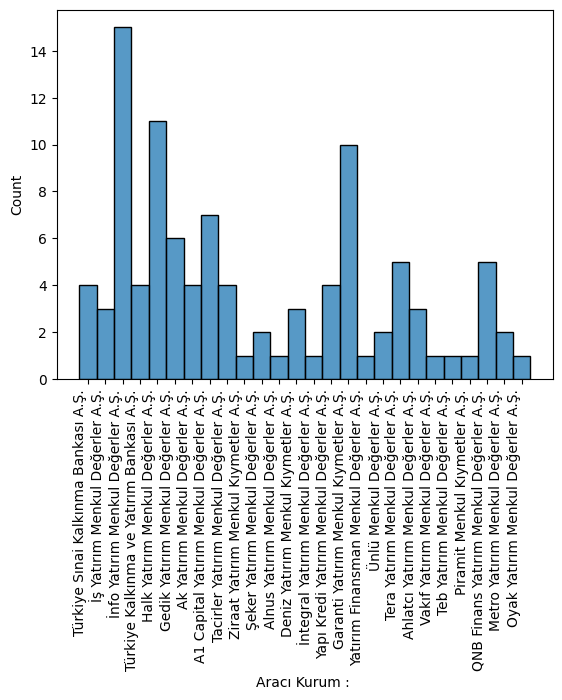

In [100]:
ax = sns.histplot(data=df, x=df["Aracı Kurum : "]);
ax.set_xticklabels(ax.get_xticklabels(),rotation=90);

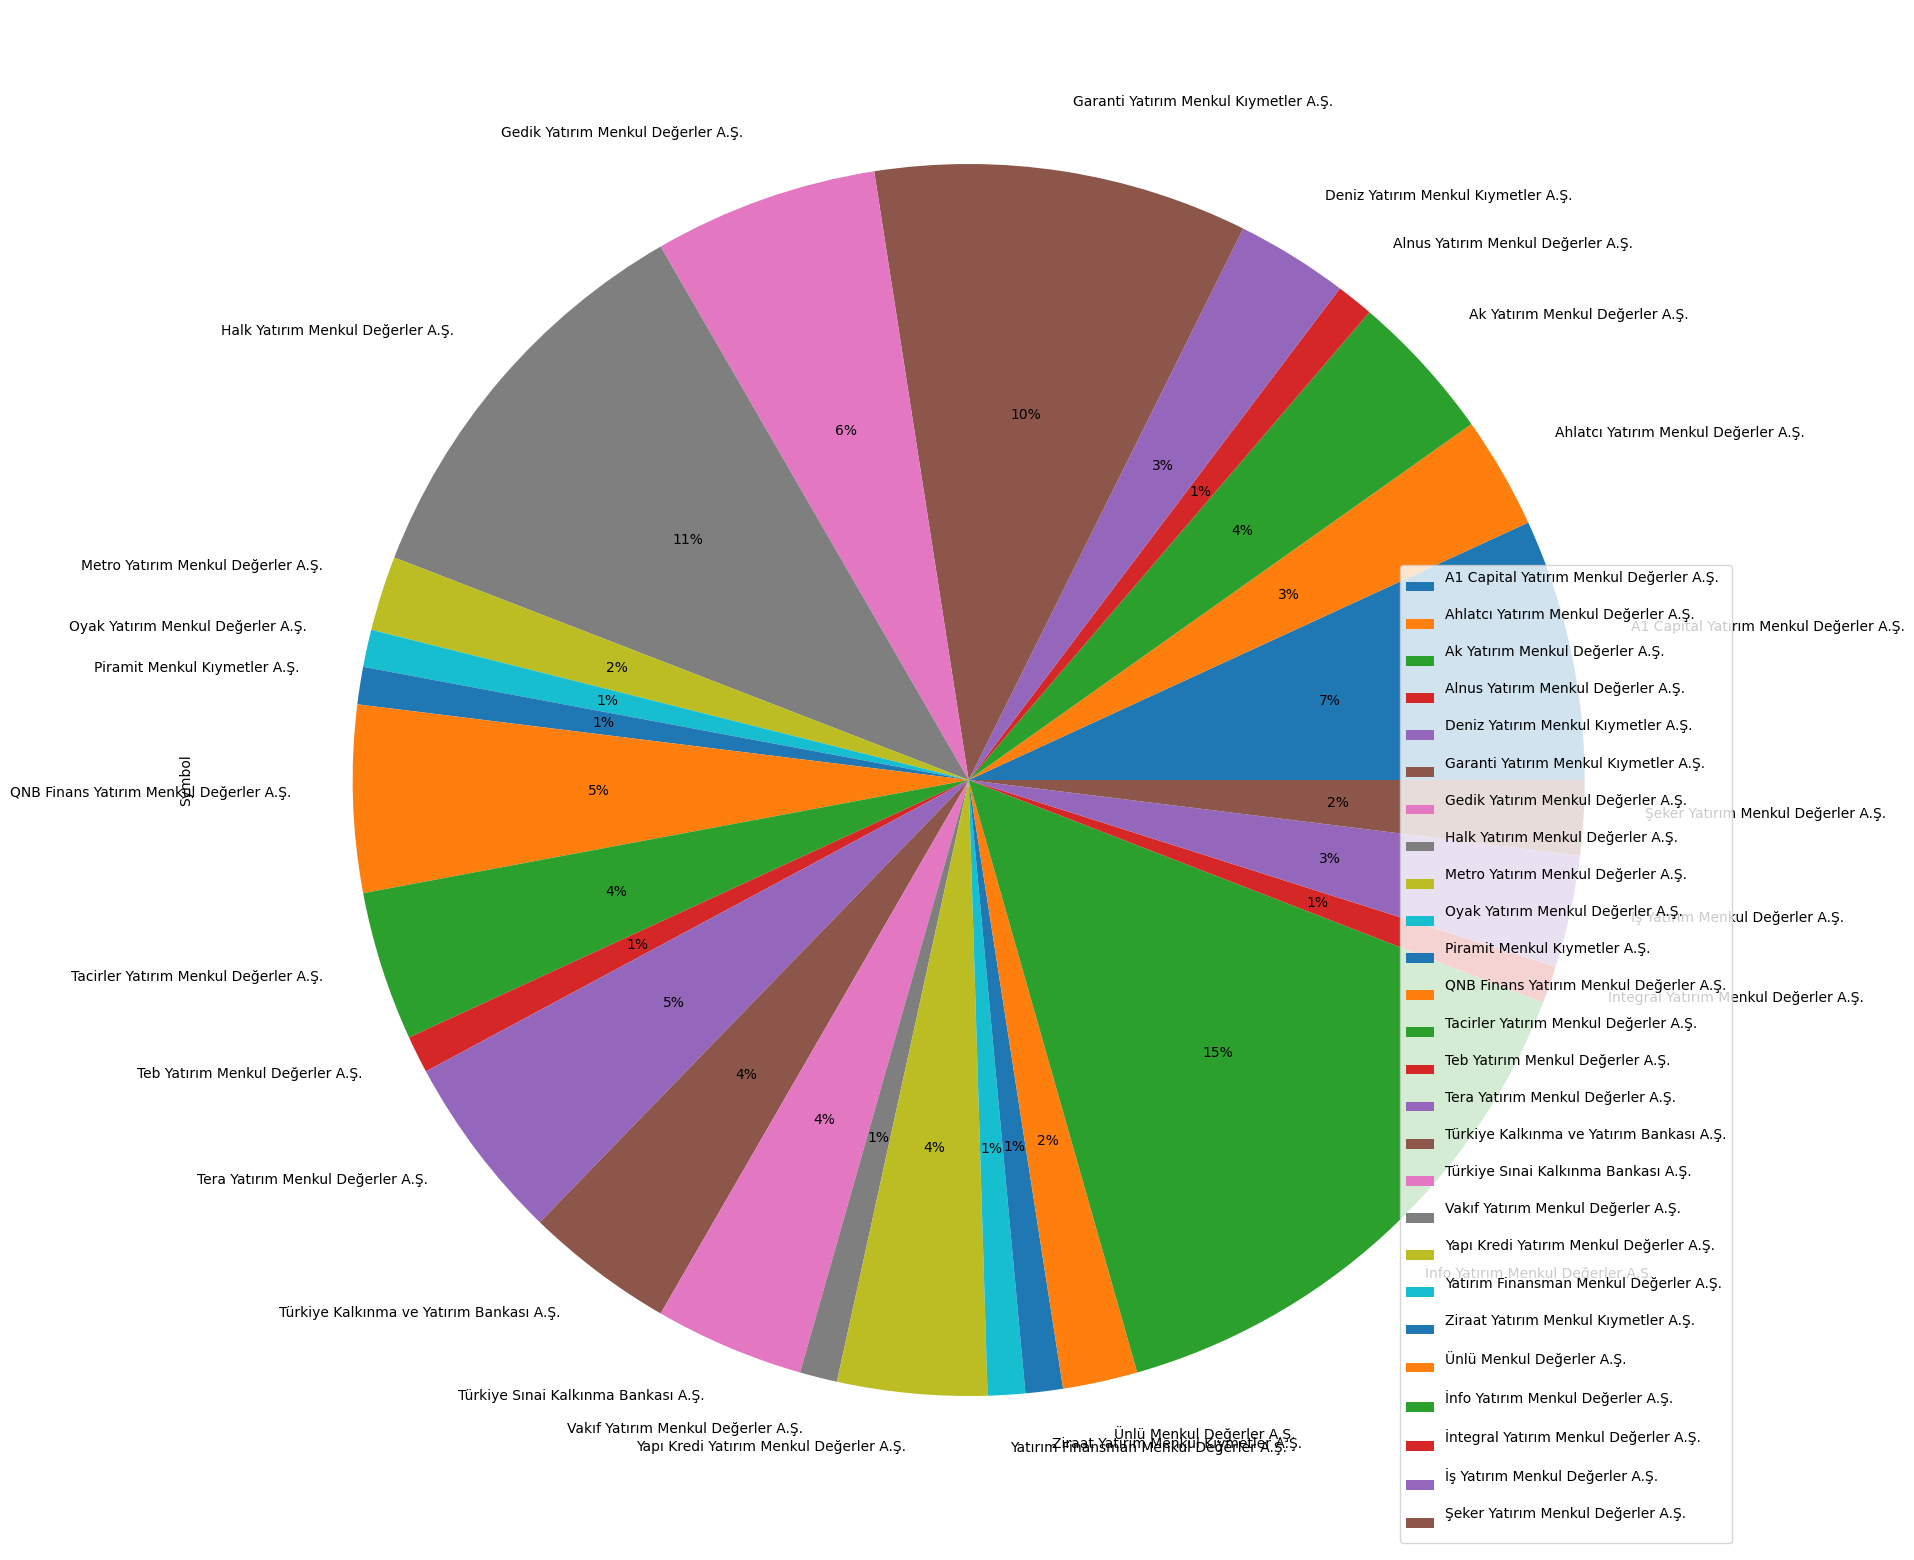

In [101]:
df.groupby(['Aracı Kurum : ']).count().plot(kind='pie', y='Symbol',autopct='%1.0f%%',figsize=(20,20));

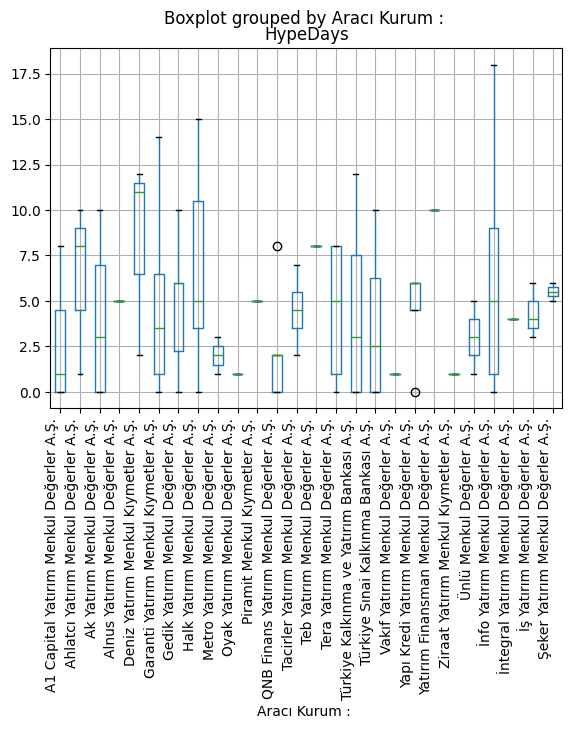

In [113]:
df.boxplot(column='HypeDays', by='Aracı Kurum : ', rot=90);

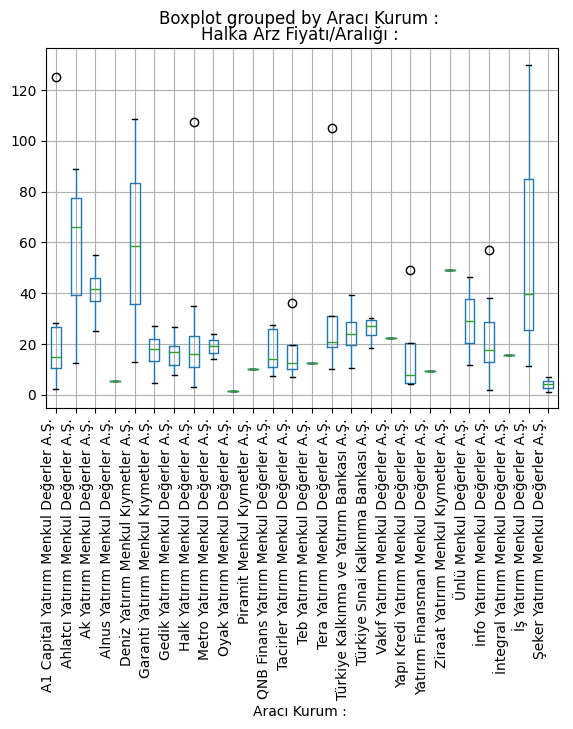

In [109]:
df.boxplot(column='Halka Arz Fiyatı/Aralığı : ', by='Aracı Kurum : ', rot=90);

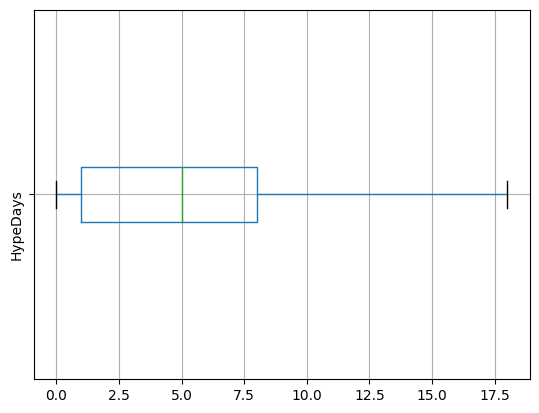

In [107]:
df.boxplot(column='HypeDays', rot=90, vert=False, grid=True);

<Axes: >

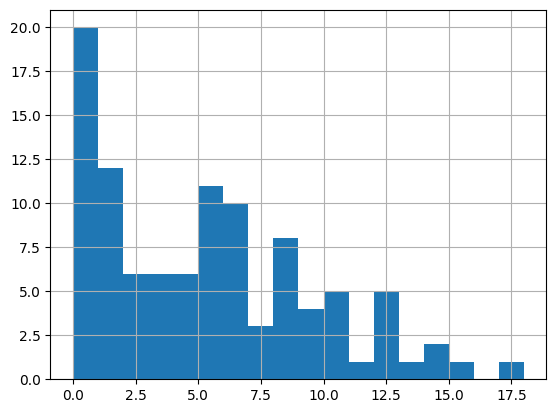

In [104]:
df['HypeDays'].hist(bins=int(df['HypeDays'].max()))

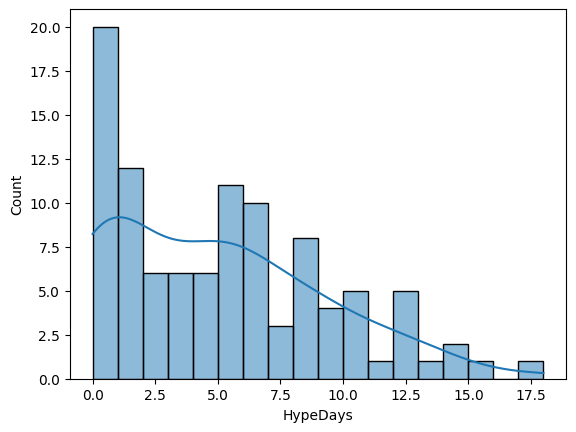

In [105]:
sns.histplot(data=df, x=df["HypeDays"], bins=int(df['HypeDays'].max()), kde=True); # This looks much better.

In [27]:
bins = [0, 10., 20., 30., 40., 50., 60., 70., 80., 90., 100.]
labels = [0, 15., 25., 35., 45., 55., 65., 75., 85., 95.]
df['New_Bireysel_Oran'] = pd.cut(df['Bireysel_Oran'], bins=bins, labels=labels)

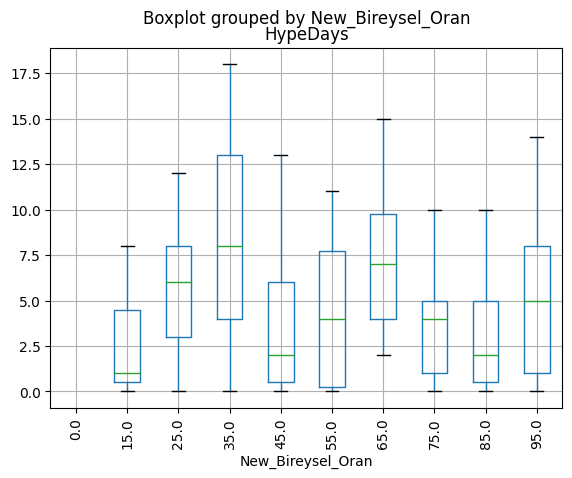

In [46]:
df.boxplot(column='HypeDays', by='New_Bireysel_Oran', rot=90);

In [28]:
bins = [0., 1000., 2000., 3000., 4000., 5000., 6000., 7000., 8000., 9000., 10000.]
labesl = [500, 1500, 2500, 3500, 4500, 5500, 6500, 7500, 8500, 9500]
df['New_Piyasa Değeri (mn $)'] = pd.cut(df['Piyasa Değeri (mn $)'], bins=bins, labels=labels)

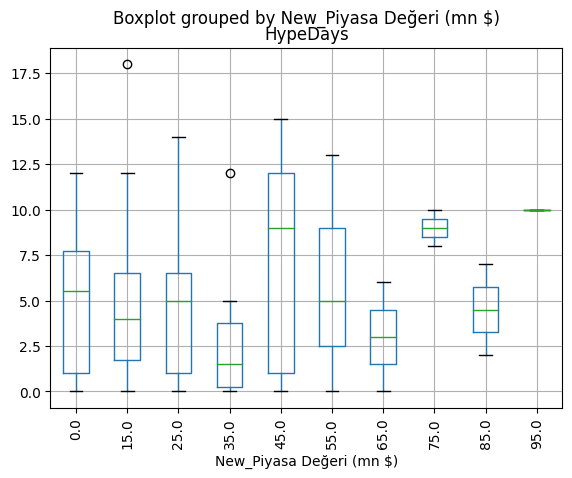

In [70]:
df.boxplot(column='HypeDays', by='New_Piyasa Değeri (mn $)', rot=90);

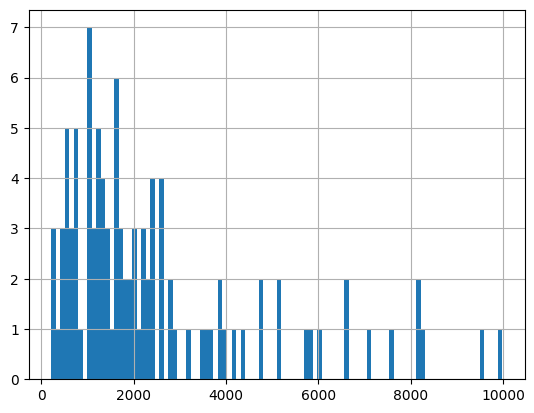

In [127]:
df['Sermaye (mn TL)'].hist(bins=100);

In [29]:
bins = [0., 1000., 2000., 3000., 4000., 5000., 6000., 7000., 8000., 9000., 10000.]
labesl = [500, 1500, 2500, 3500, 4500, 5500, 6500, 7500, 8500, 9500]
df['New_Sermaye'] = pd.cut(df['Sermaye (mn TL)'], bins=bins, labels=labels)

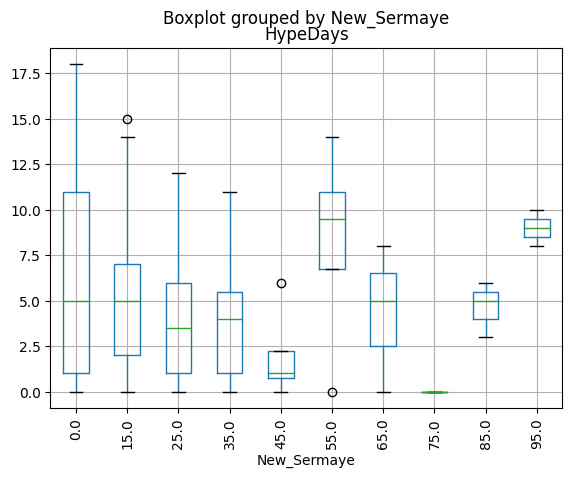

In [129]:
df.boxplot(column='HypeDays', by='New_Sermaye', rot=90);

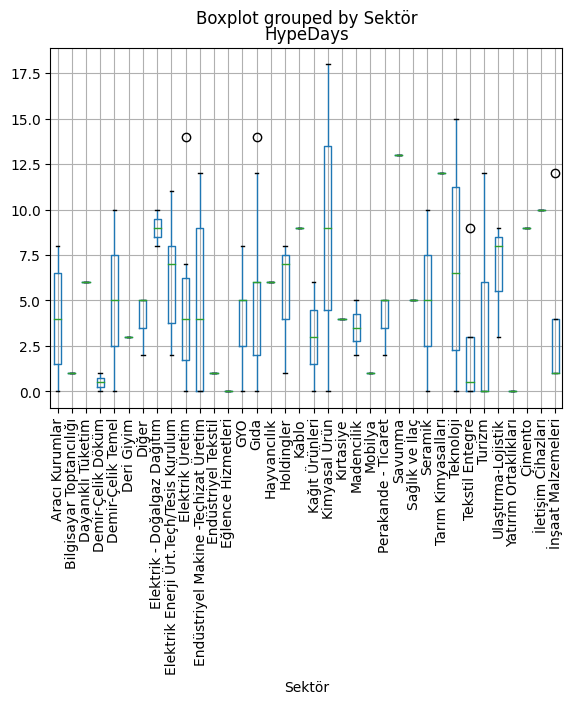

In [29]:
df.boxplot(column='HypeDays', by='Sektör', rot=90);

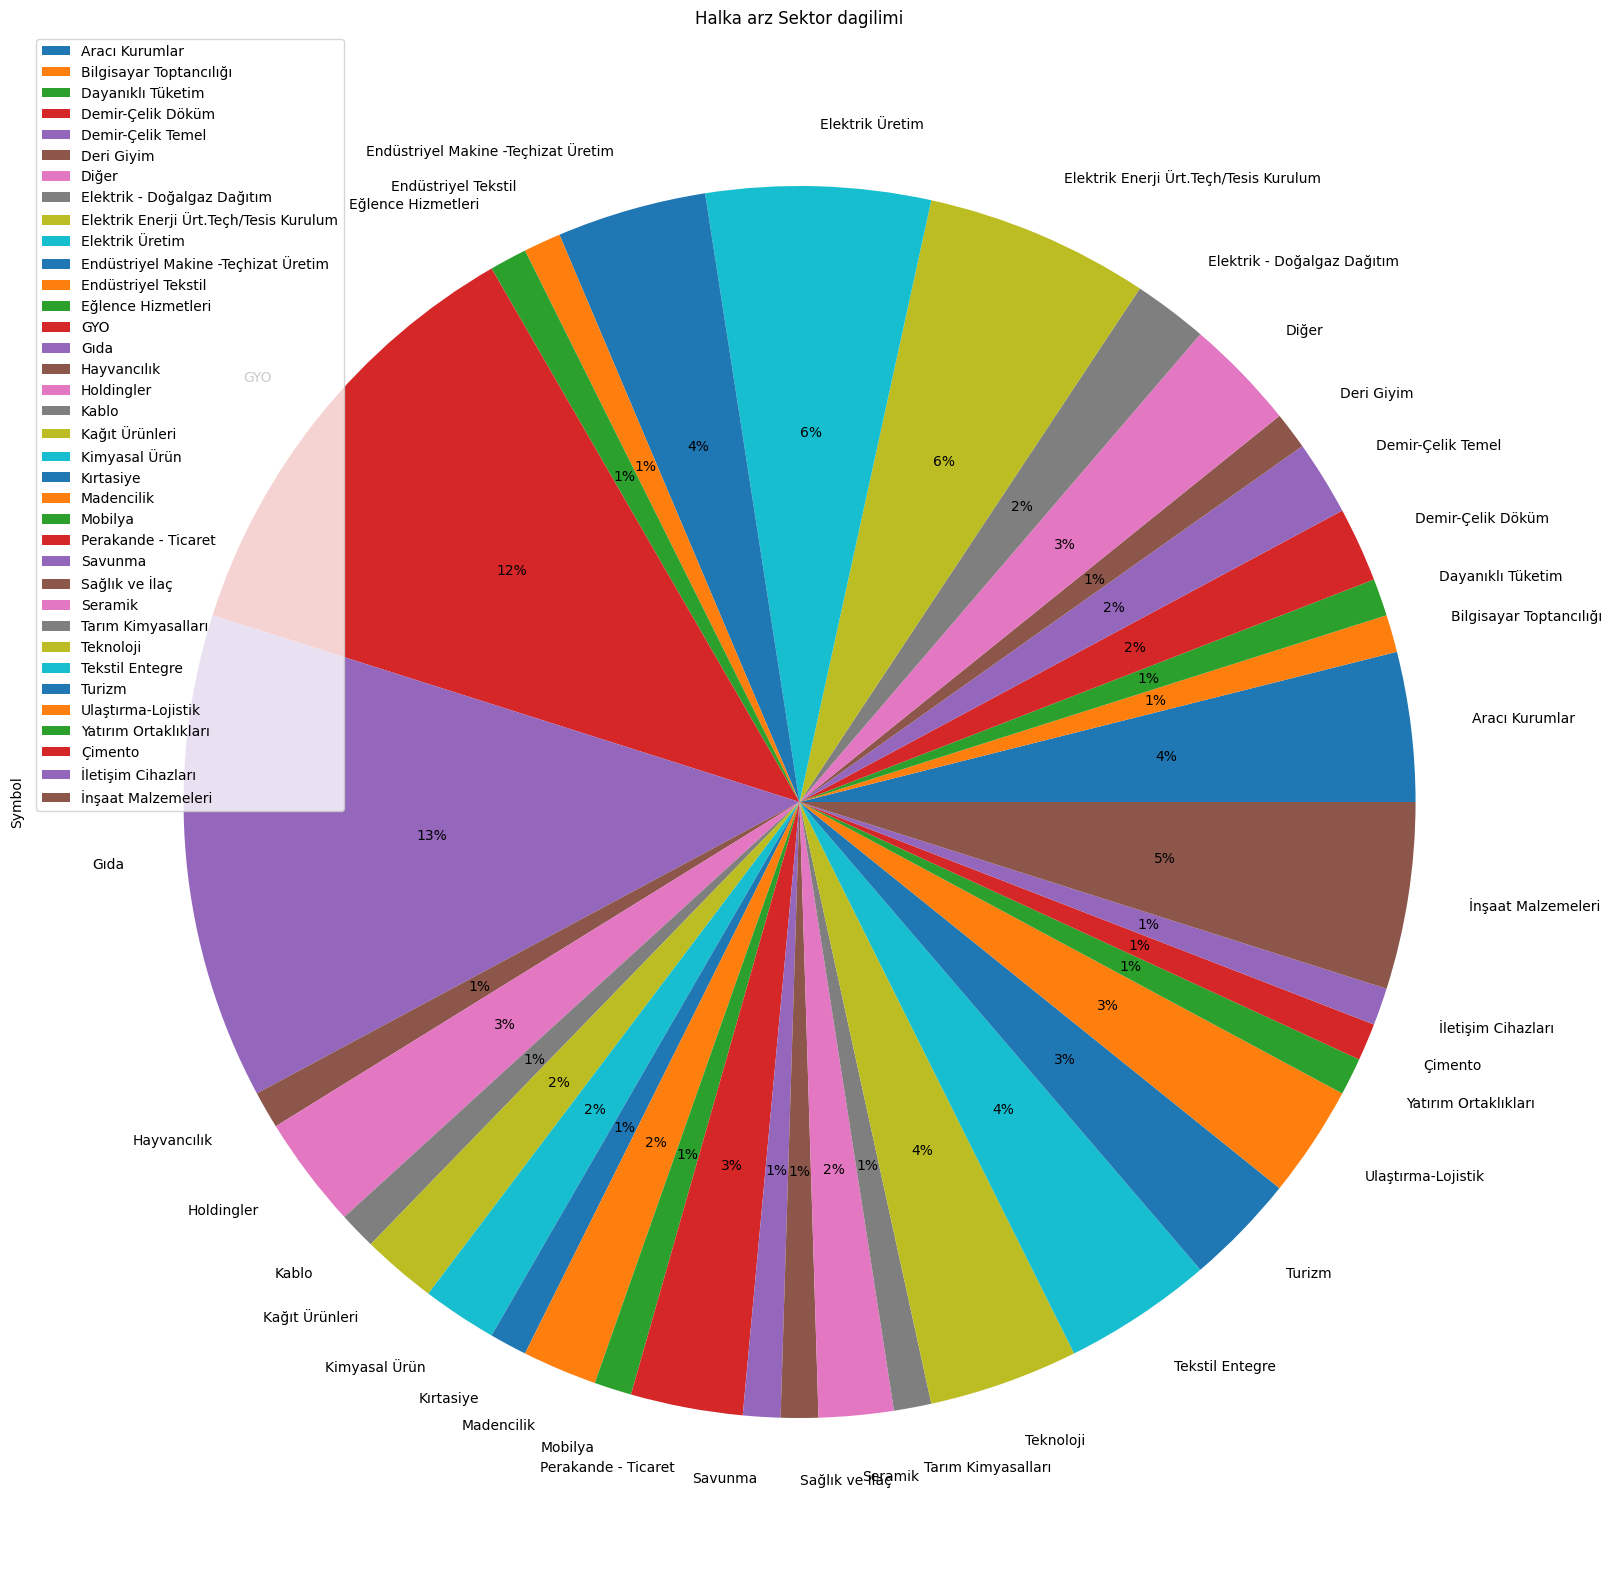

In [32]:
df.groupby(['Sektör']).count().plot(kind='pie', y='Symbol',autopct='%1.0f%%',figsize=(20,20), title='Halka arz Sektor dagilimi');

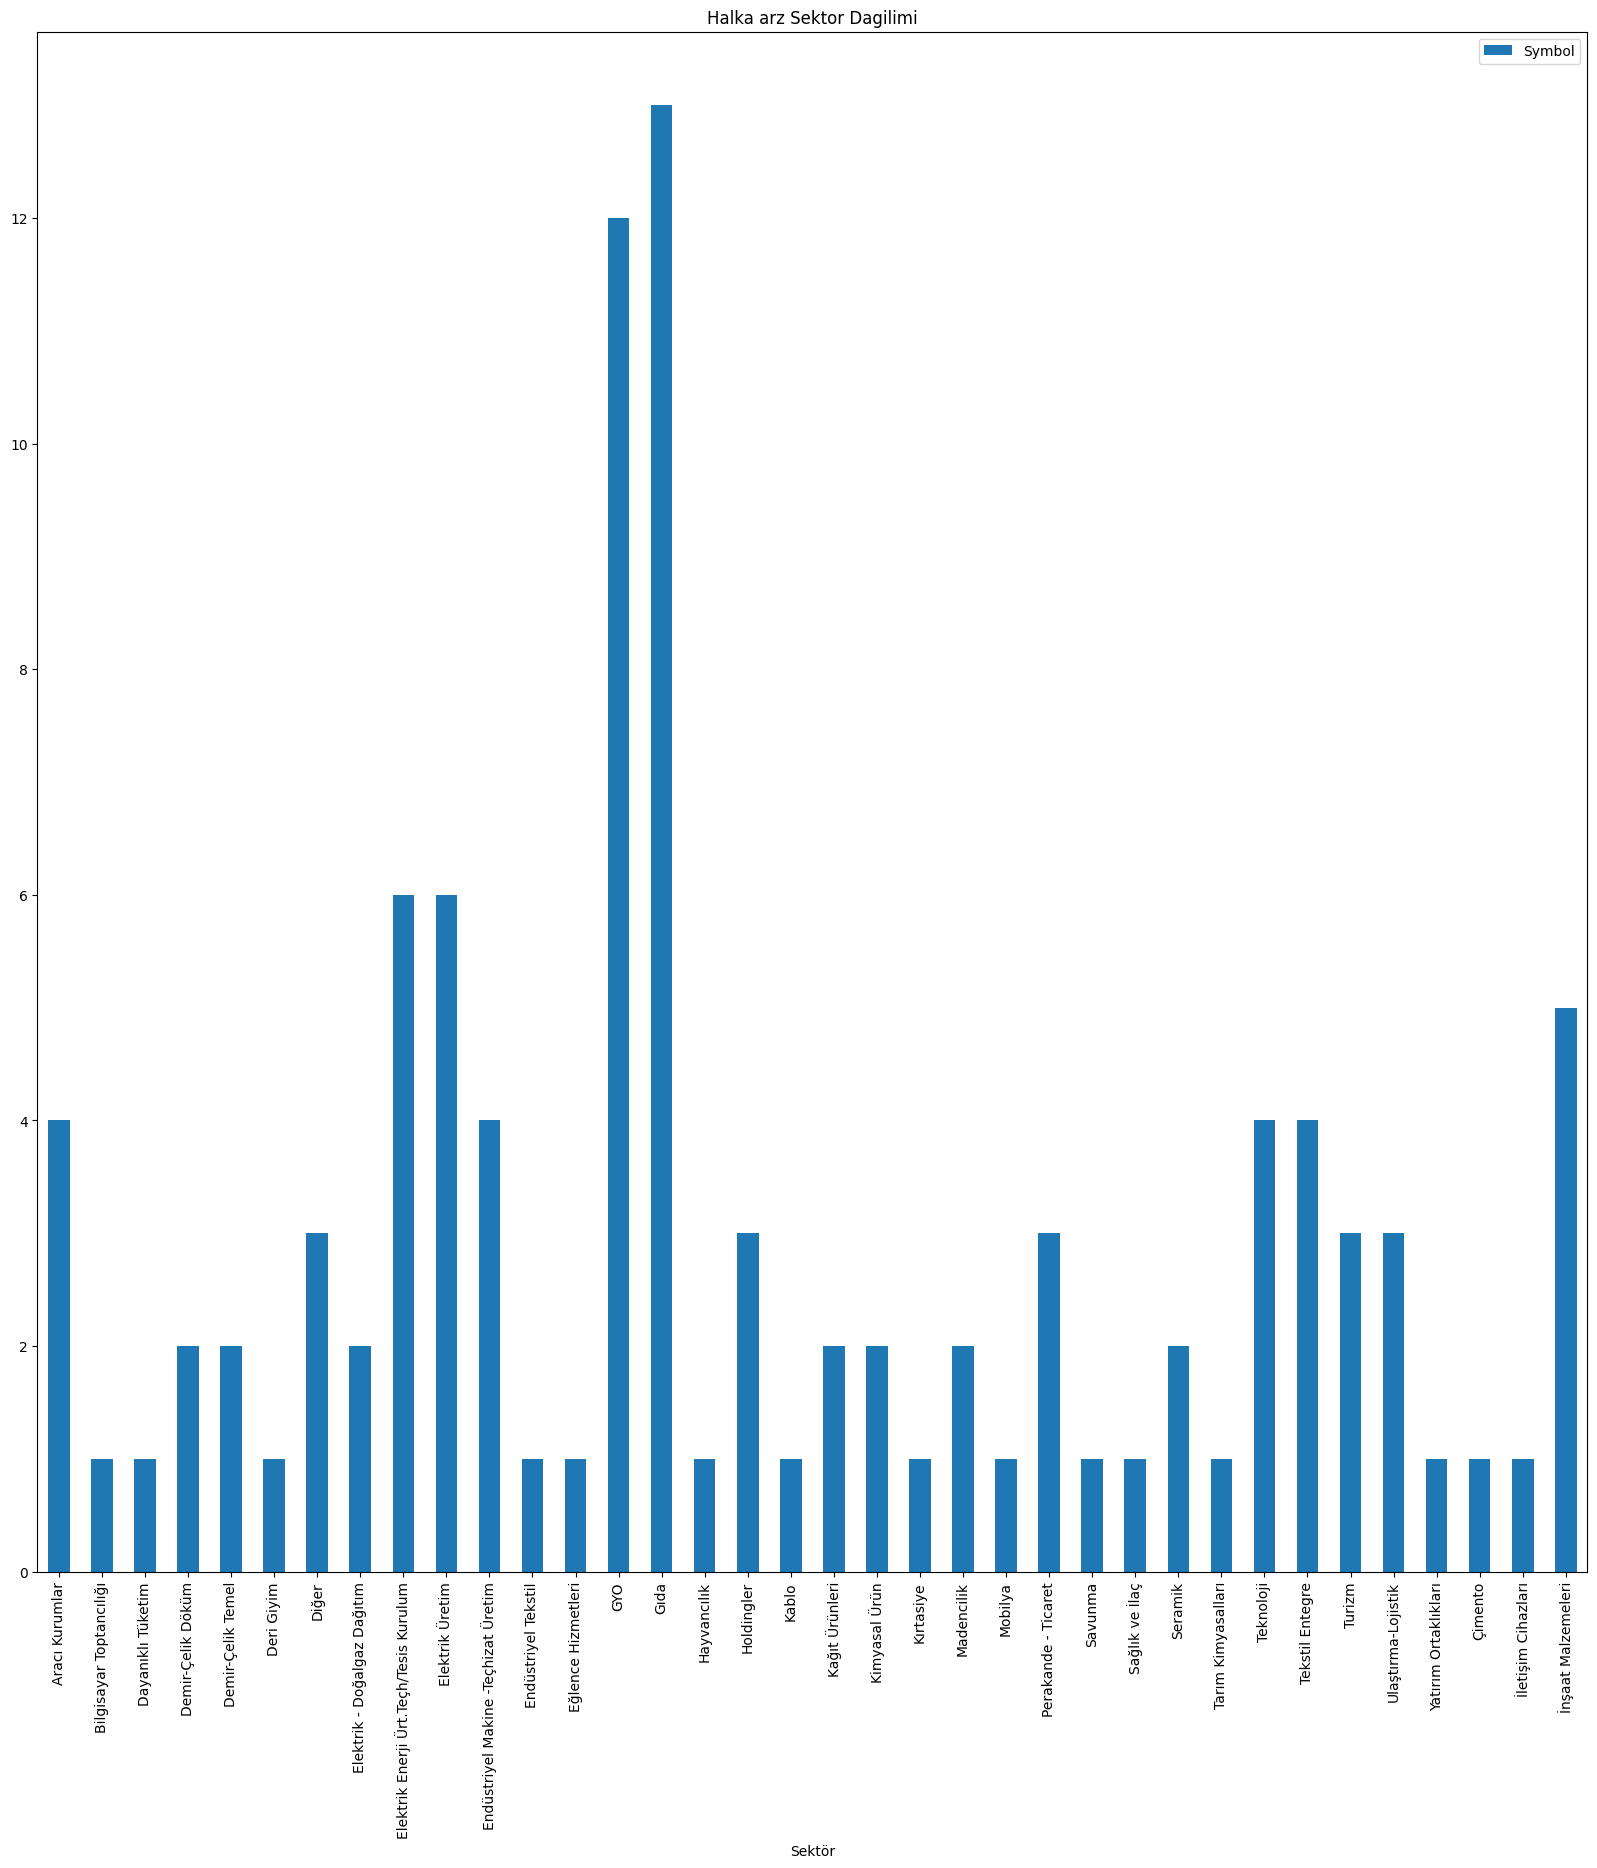

In [140]:
df.groupby(['Sektör']).count().plot(kind='bar', y='Symbol',figsize=(20,20), title='Halka arz Sektor Dagilimi');

In [133]:
df.columns

Index(['Halka Arz Fiyatı/Aralığı : ', 'Dağıtım Yöntemi : ', 'Pay : ', 'Symbol',
       'Pazar : ', 'Aracı Kurum : ', 'Bist İlk İşlem Tarihi : ', 'HypeDays',
       'Yurtici_Kisi', 'Yurtici_Lot', 'Yurtdisi_Kisi', 'Yurtdisi_Lot',
       'Yurtici_Kurumsal', 'Yurtici_Kurumsal_Lot', 'Yurtdisi_Kurumsal',
       'Yurtdisi_Kurumsal_Lot', 'Sirket_Calisanlari_Kisi',
       'Sirket_Calisanlari_Lot', 'Yuksek Başvurulu_Kisi',
       'Yuksek Başvurulu_Lot', 'Yuksek Başvurulu Bireysel_Kisi',
       'Yuksek Başvurulu Bireysel_Lot', 'Total_Lot', 'Total_Kisi',
       'Kurumsal_Oran', 'Bireysel_Oran', 'Bireysel_Kisi_Oran',
       'Kurumsal_Kisi_Oran', 'Sektör', 'Piyasa Değeri (mn TL)',
       'Piyasa Değeri (mn $)', 'Halka Açıklık Oranı (%)', 'Sermaye (mn TL)',
       'New_Sermaye', 'New_Bireysel_Oran', 'New_Piyasa Değeri (mn $)'],
      dtype='object')

In [37]:
df['Bireysel_Oran']

0      60.000000
1      80.000000
2      99.997760
3      49.000000
4      80.000000
         ...    
97     20.000001
98     91.759032
99     85.995356
100    99.979952
101    50.000000
Name: Bireysel_Oran, Length: 102, dtype: float64

In [36]:
df.head(1)

Halka Arz Fiyatı/Aralığı :  Dağıtım Yöntemi :           Pay :  Symbol  \
0                         30.0       Eşit Dağıtım  44,200,000 Lot  ODINE   

       Pazar :                                      Aracı Kurum :   \
0  Yıldız Pazar  Türkiye Sınai Kalkınma Bankası A.Ş.\n         ...   

  Bist İlk İşlem Tarihi :   HypeDays  Yurtici_Kisi  Yurtici_Lot  ...  \
0               2024-03-21      10.0     3198260.0   26520000.0  ...   

   Bireysel_Kisi_Oran  Kurumsal_Kisi_Oran     Sektör  Piyasa Değeri (mn TL)  \
0           99.994185            0.005815  Teknoloji                 8795.0   

   Piyasa Değeri (mn $)  Halka Açıklık Oranı (%)  Sermaye (mn TL)  \
0                2701.0                      400           1105.0   

   New_Bireysel_Oran  New_Piyasa Değeri (mn $)  New_Sermaye  
0               55.0                      25.0         15.0  

[1 rows x 36 columns]

In [31]:
df_ = df[['Halka Arz Fiyatı/Aralığı : ', 'HypeDays', 'Total_Lot', 'Total_Kisi',
       'Kurumsal_Oran', 'Bireysel_Oran', 'Bireysel_Kisi_Oran',
       'Kurumsal_Kisi_Oran', 'Sektör', 'Piyasa Değeri (mn TL)',
       'Piyasa Değeri (mn $)', 'Halka Açıklık Oranı (%)', 'Sermaye (mn TL)']]

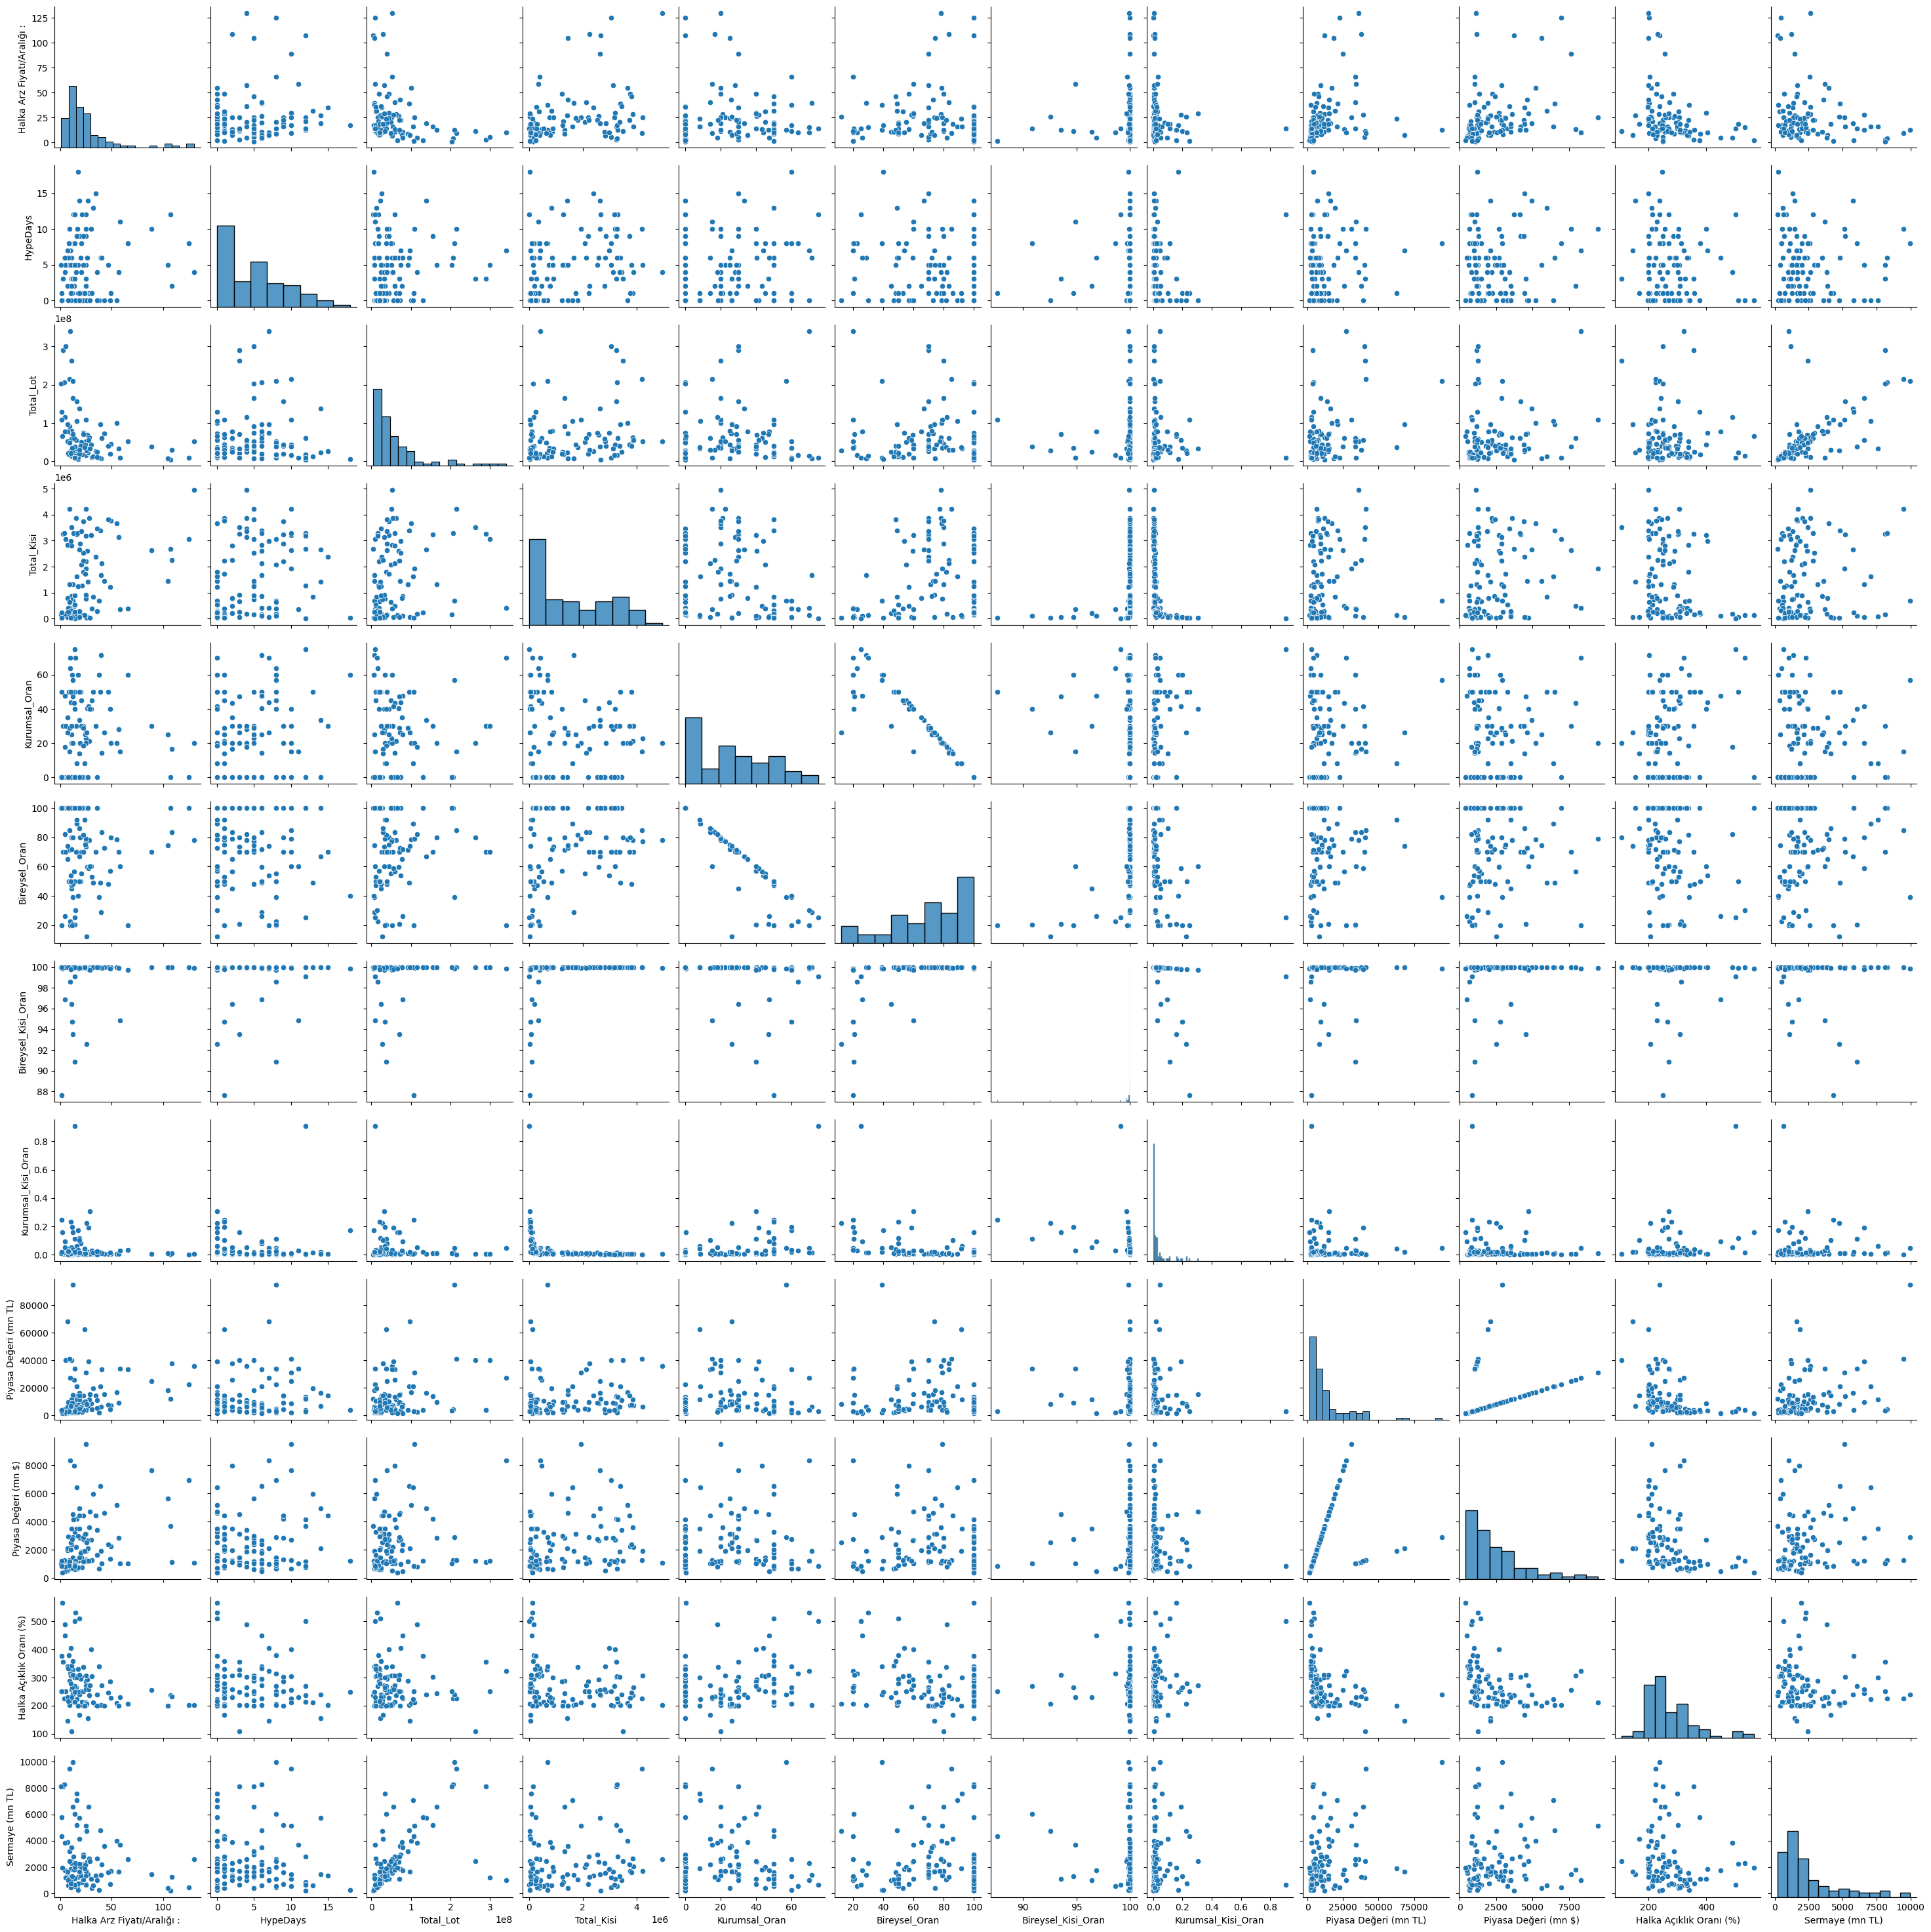

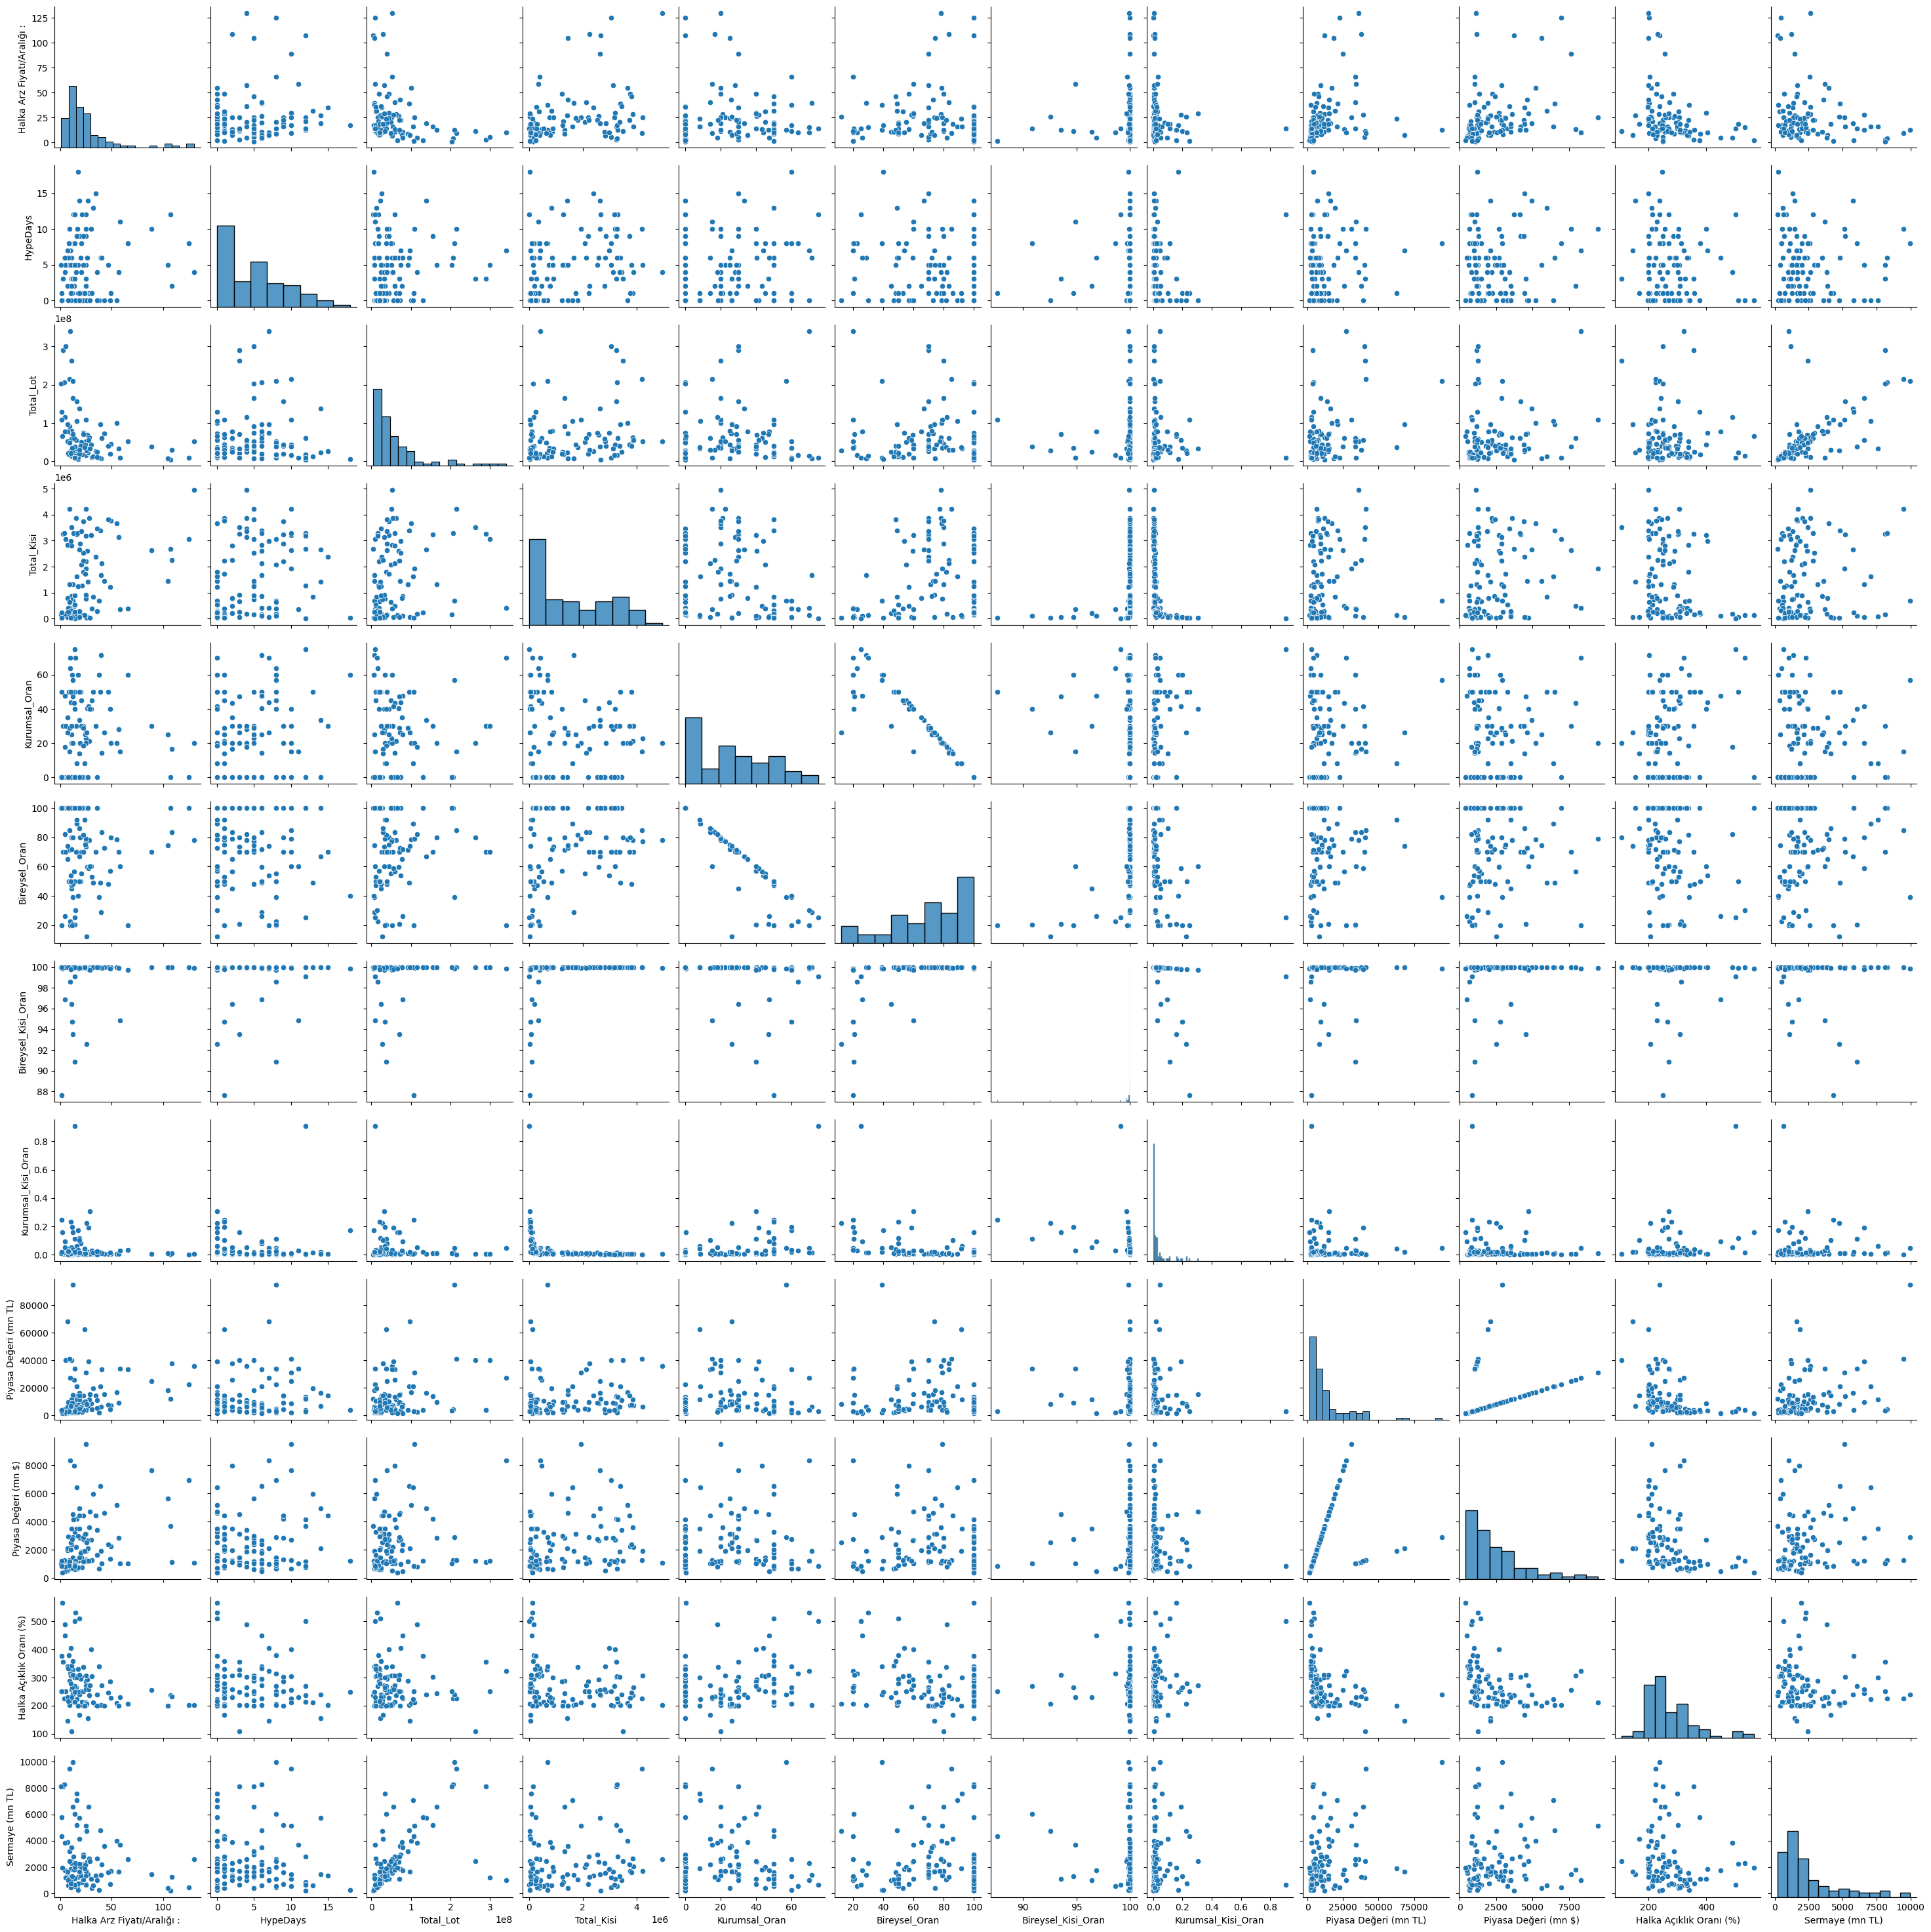

In [35]:
sns.pairplot(df_);


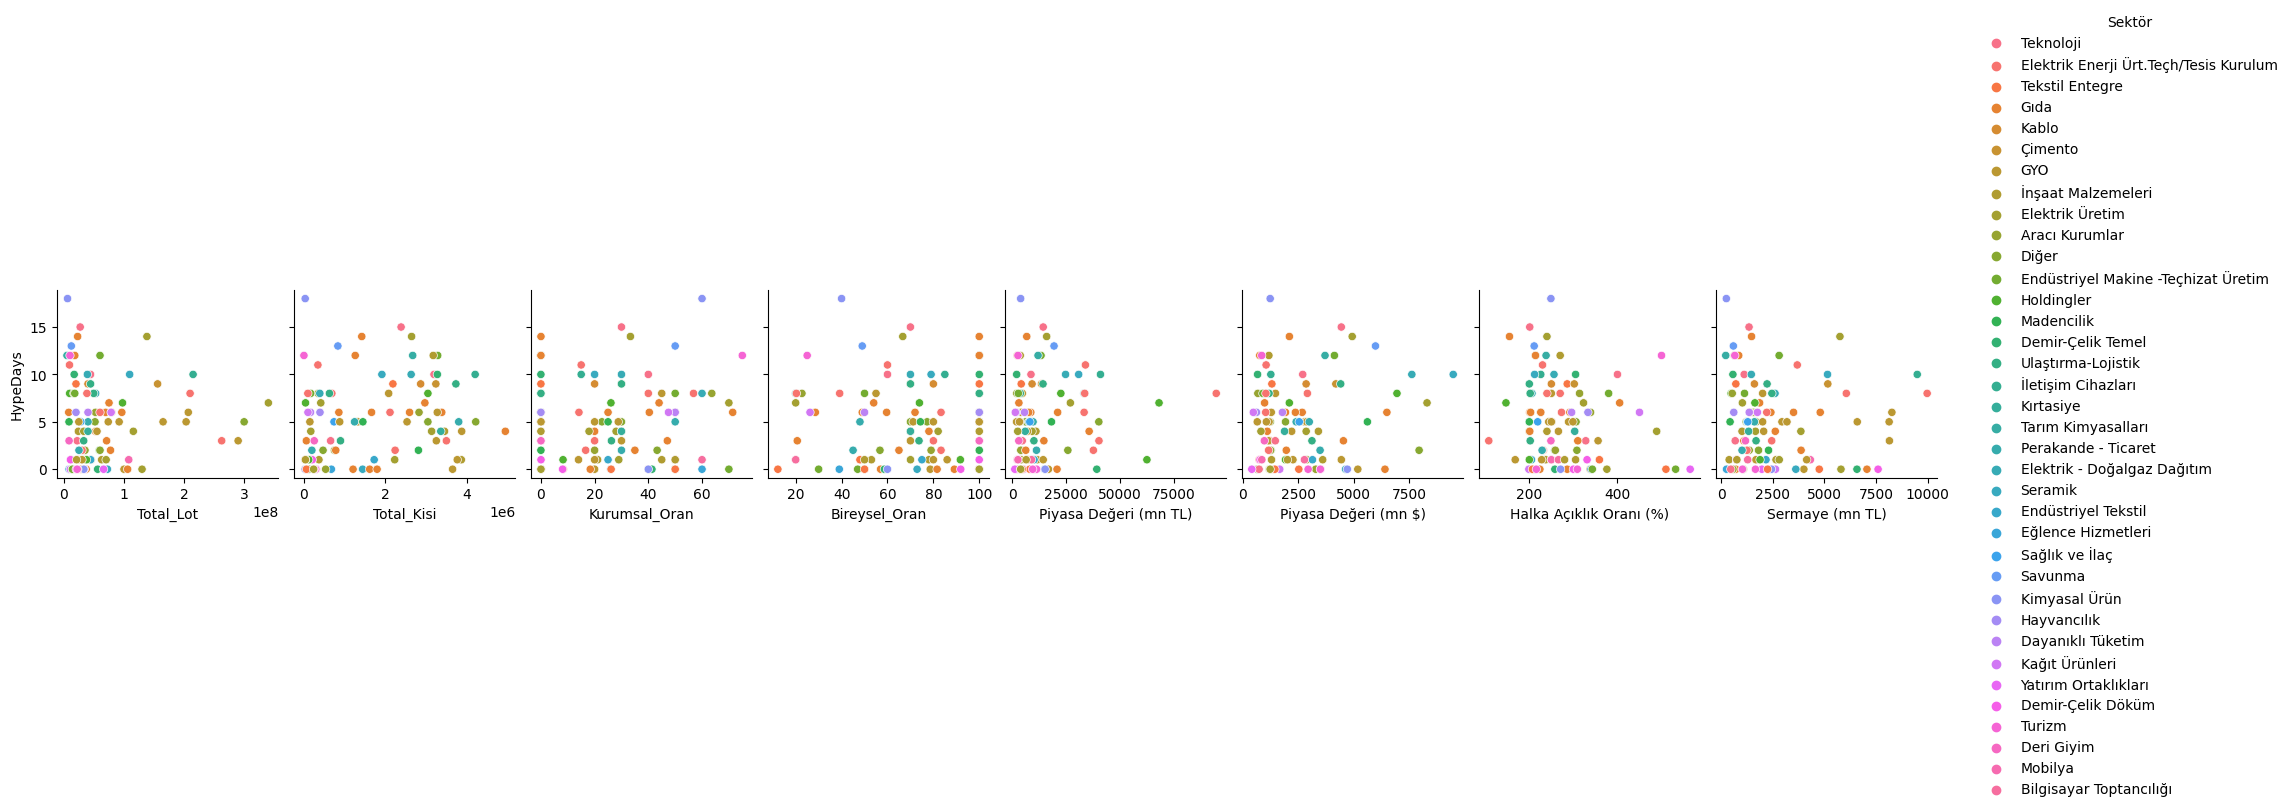

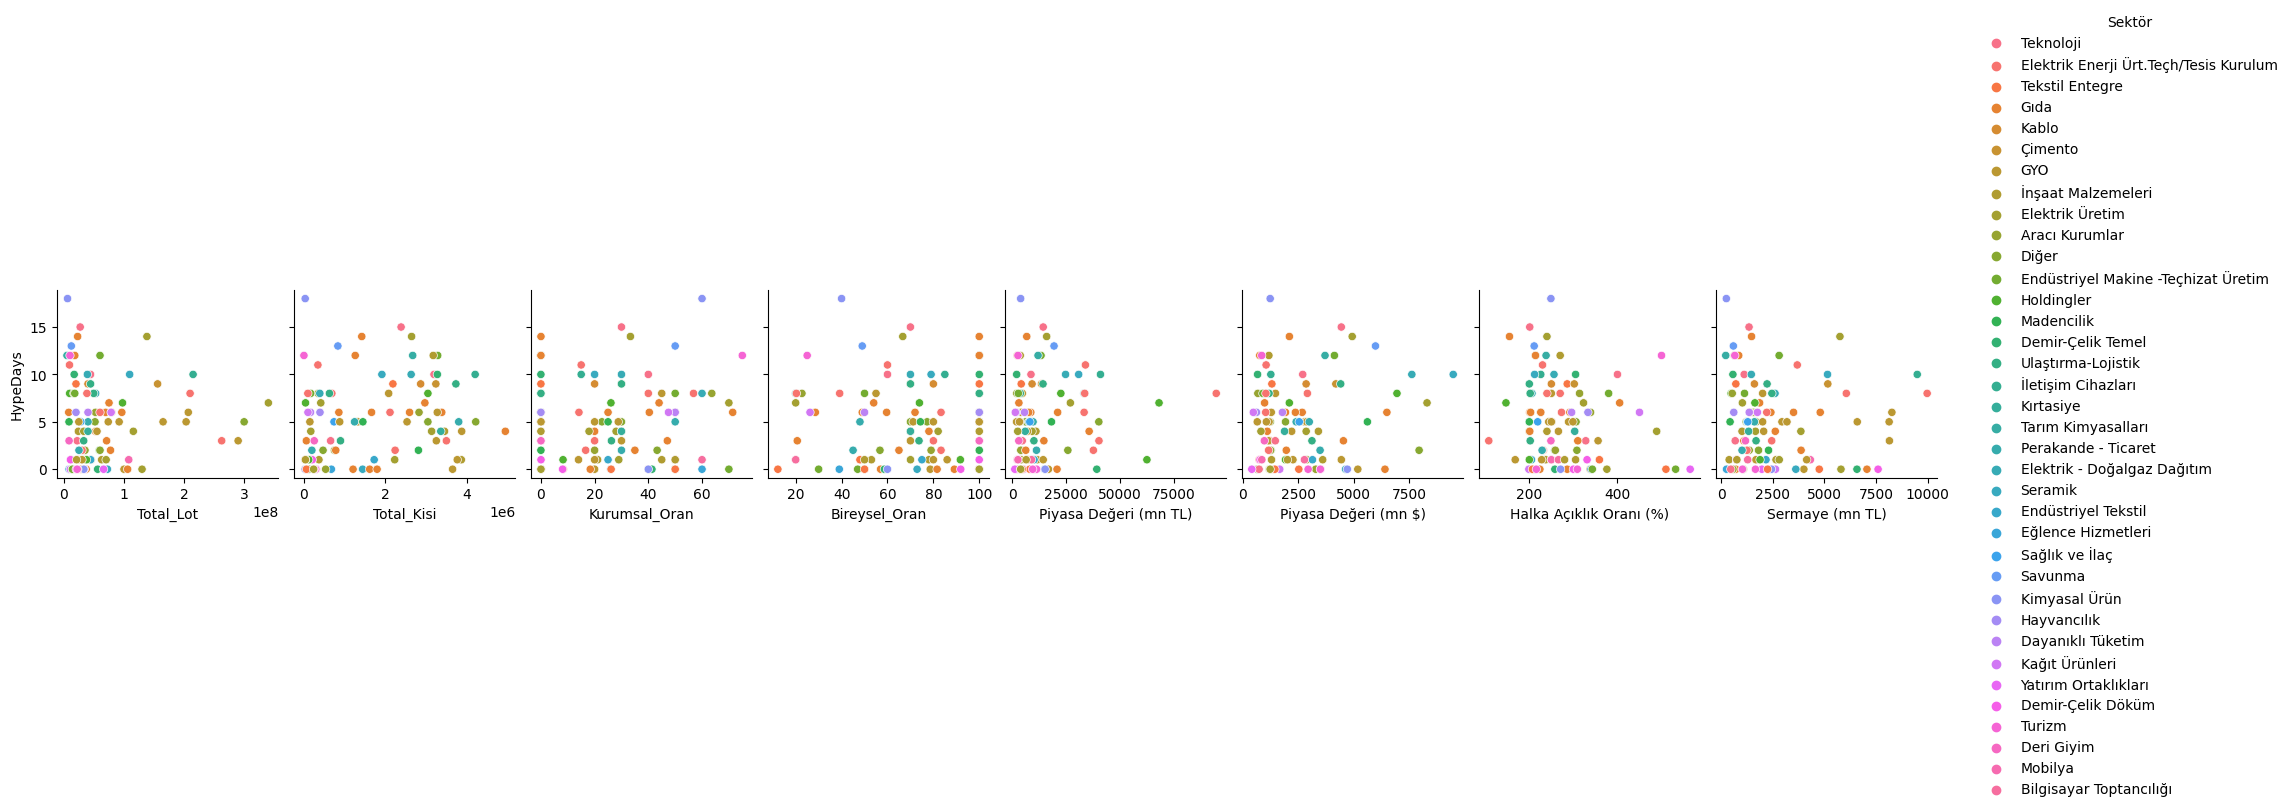

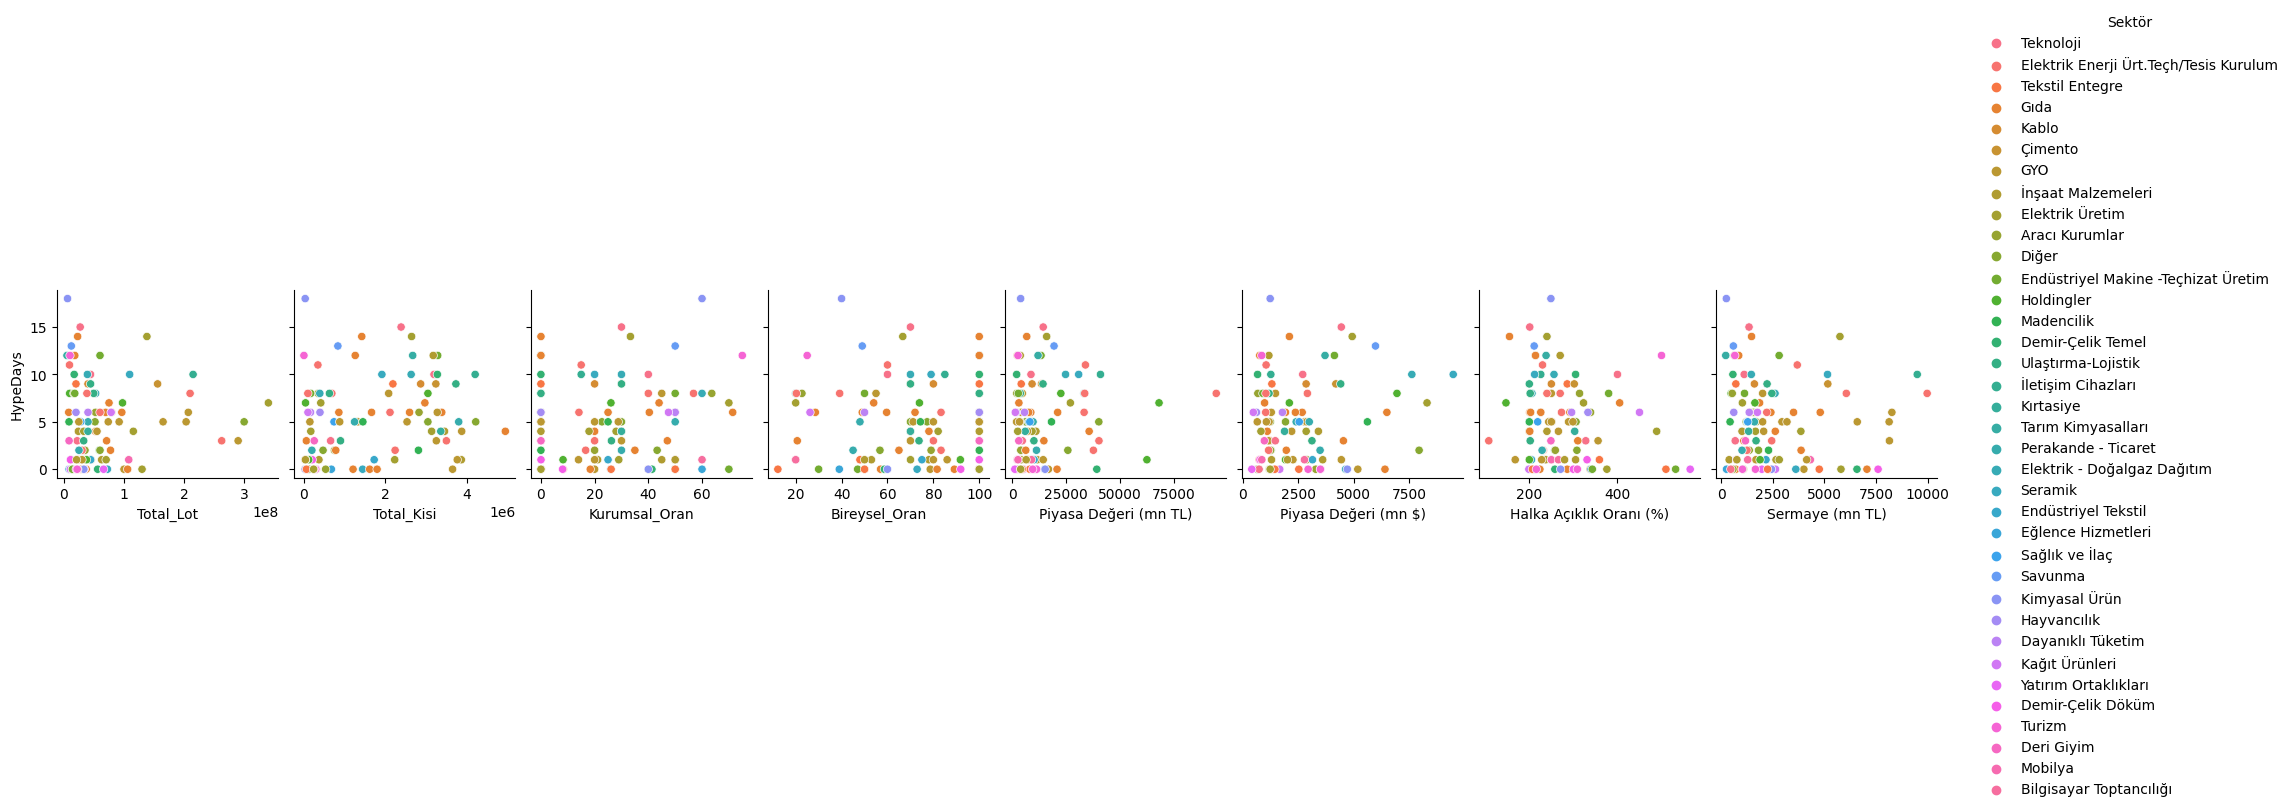

In [41]:
sns.pairplot(df, x_vars=['Total_Lot', 'Total_Kisi',
       'Kurumsal_Oran', 'Bireysel_Oran', 'Piyasa Değeri (mn TL)',
       'Piyasa Değeri (mn $)', 'Halka Açıklık Oranı (%)', 'Sermaye (mn TL)'],
       y_vars=['HypeDays'], hue='Sektör')
plt.show()

In [61]:
df.corr().sort_values('HypeDays', ascending=False)['HypeDays']

C:\Users\atliu\AppData\Local\Temp\ipykernel_4376\2851762925.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr().sort_values('HypeDays', ascending=False)['HypeDays']


HypeDays                          1.000000
Total_Kisi                        0.266663
Yurtici_Kisi                      0.266247
Yurtdisi_Kisi                     0.260528
Yurtici_Kurumsal                  0.170139
Piyasa Değeri (mn $)              0.117030
Piyasa Değeri (mn TL)             0.111930
Halka Arz Fiyatı/Aralığı :        0.108605
Yuksek Başvurulu_Kisi             0.105989
Bireysel_Kisi_Oran                0.066601
Yurtici_Kurumsal_Lot              0.061806
Yurtdisi_Kurumsal_Lot             0.056738
Sirket_Calisanlari_Lot            0.049984
Total_Lot                         0.038350
Kurumsal_Oran                     0.028621
Yurtdisi_Lot                      0.017992
Yurtici_Lot                       0.014270
Kurumsal_Kisi_Oran                0.011856
Bireysel_Oran                    -0.001972
Yuksek Başvurulu Bireysel_Lot    -0.015029
Yuksek Başvurulu Bireysel_Kisi   -0.018616
Sermaye (mn TL)                  -0.046453
Sirket_Calisanlari_Kisi          -0.047103
Yuksek Başv

C:\Users\atliu\AppData\Local\Temp\ipykernel_4376\229797290.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr().sort_values('HypeDays', ascending=False)[['HypeDays']], vmax=1., vmin=-1);


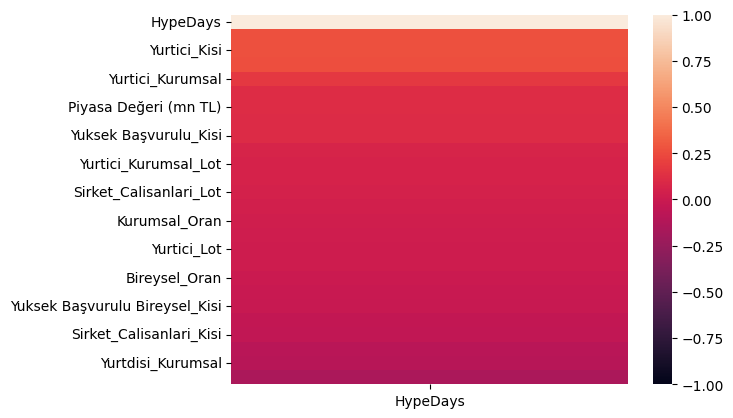

In [68]:
sns.heatmap(df.corr().sort_values('HypeDays', ascending=False)[['HypeDays']], vmax=1., vmin=-1);
plt.show()

### Model Training

In [69]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 102 entries, 0 to 101
Data columns (total 36 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   Halka Arz Fiyatı/Aralığı :      102 non-null    float64       
 1   Dağıtım Yöntemi :               102 non-null    object        
 2   Pay :                           102 non-null    object        
 3   Symbol                          102 non-null    object        
 4   Pazar :                         102 non-null    object        
 5   Aracı Kurum :                   102 non-null    object        
 6   Bist İlk İşlem Tarihi :         102 non-null    datetime64[ns]
 7   HypeDays                        102 non-null    float64       
 8   Yurtici_Kisi                    102 non-null    float64       
 9   Yurtici_Lot                     102 non-null    float64       
 10  Yurtdisi_Kisi                   102 non-null    float64       
 11  Yurtdi

In [70]:
lb = LabelEncoder()

In [74]:
df_ = df.copy()
df_.columns

Index(['Halka Arz Fiyatı/Aralığı : ', 'Dağıtım Yöntemi : ', 'Pay : ', 'Symbol',
       'Pazar : ', 'Aracı Kurum : ', 'Bist İlk İşlem Tarihi : ', 'HypeDays',
       'Yurtici_Kisi', 'Yurtici_Lot', 'Yurtdisi_Kisi', 'Yurtdisi_Lot',
       'Yurtici_Kurumsal', 'Yurtici_Kurumsal_Lot', 'Yurtdisi_Kurumsal',
       'Yurtdisi_Kurumsal_Lot', 'Sirket_Calisanlari_Kisi',
       'Sirket_Calisanlari_Lot', 'Yuksek Başvurulu_Kisi',
       'Yuksek Başvurulu_Lot', 'Yuksek Başvurulu Bireysel_Kisi',
       'Yuksek Başvurulu Bireysel_Lot', 'Total_Lot', 'Total_Kisi',
       'Kurumsal_Oran', 'Bireysel_Oran', 'Bireysel_Kisi_Oran',
       'Kurumsal_Kisi_Oran', 'Sektör', 'Piyasa Değeri (mn TL)',
       'Piyasa Değeri (mn $)', 'Halka Açıklık Oranı (%)', 'Sermaye (mn TL)',
       'New_Bireysel_Oran', 'New_Piyasa Değeri (mn $)', 'New_Sermaye'],
      dtype='object')

In [76]:
x = df_.drop(columns=['New_Bireysel_Oran', 'New_Piyasa Değeri (mn $)', 'New_Sermaye', 'Dağıtım Yöntemi : ', 'Pay : ', 'Symbol', 'Pazar : ', 'Aracı Kurum : ',
                      'Bist İlk İşlem Tarihi : ', 'HypeDays'])
y = df_[['HypeDays']]

In [78]:
x['Sektör'] = lb.fit_transform(x['Sektör'])

In [80]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


#### OLS

In [83]:
lm = sm.OLS(y_train, x_train)
model = lm.fit()

In [84]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:               HypeDays   R-squared (uncentered):                   0.717
Model:                            OLS   Adj. R-squared (uncentered):              0.612
Method:                 Least Squares   F-statistic:                              6.805
Date:                Sun, 21 Apr 2024   Prob (F-statistic):                    1.98e-09
Time:                        18:29:14   Log-Likelihood:                         -215.67
No. Observations:                  81   AIC:                                      475.3
Df Residuals:                      59   BIC:                                      528.0
Df Model:                          22                                                  
Covariance Type:            nonrobust                                                  
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Halka Arz Fiyatı/Aralığı :        -0.0281      0.027     -1.035      0.305      -0.082       0.026
Yurtici_Kisi                      -0.0009      0.004     -0.242      0.810      -0.008       0.007
Yurtici_Lot                    -9.428e-07   2.38e-06     -0.397      0.693    -5.7e-06    3.81e-06
Yurtdisi_Kisi                      0.0001      0.004      0.032      0.975      -0.007       0.008
Yurtdisi_Lot                    6.022e-06   1.43e-05      0.421      0.676   -2.26e-05    3.47e-05
Yurtici_Kurumsal                  -0.0015      0.008     -0.177      0.860      -0.018       0.015
Yurtici_Kurumsal_Lot            -9.14e-07   2.32e-06     -0.394      0.695   -5.55e-06    3.72e-06
Yurtdisi_Kurumsal                  0.0046      0.023      0.196      0.845      -0.042       0.052
Yurtdisi_Kurumsal_Lot          -8.627e-07   2.34e-06     -0.369      0.713   -5.54e-06    3.81e-06
Sirket_Calisanlari_Kisi           -0.0010      0.004     -0.269      0.789      -0.009       0.007
Sirket_Calisanlari_Lot         -1.272e-06   2.59e-06     -0.491      0.625   -6.45e-06    3.91e-06
Yuksek Başvurulu_Kisi             -0.0004      0.004     -0.105      0.917      -0.008       0.007
Yuksek Başvurulu_Lot           -1.095e-06   2.42e-06     -0.453      0.652   -5.93e-06    3.74e-06
Yuksek Başvurulu Bireysel_Kisi  1.521e-13   1.09e-13      1.393      0.169   -6.64e-14    3.71e-13
Yuksek Başvurulu Bireysel_Lot   1.155e-13   8.27e-14      1.395      0.168   -5.01e-14    2.81e-13
Total_Lot                       9.286e-07   2.36e-06      0.394      0.695   -3.79e-06    5.65e-06
Total_Kisi                         0.0009      0.004      0.242      0.810      -0.007       0.008
Kurumsal_Oran                      0.1062      0.113      0.943      0.350      -0.119       0.332
Bireysel_Oran                      0.0514      0.103      0.500      0.619      -0.154       0.257
Bireysel_Kisi_Oran                -0.0127      0.109     -0.116      0.908      -0.230       0.205
Kurumsal_Kisi_Oran                 7.0952      5.086      1.395      0.168      -3.082      17.273
Sektör                             0.0053      0.053      0.099      0.921      -0.102       0.112
Piyasa Değeri (mn TL)           4.278e-05    4.6e-05      0.931      0.356   -4.92e-05       0.000
Piyasa Değeri (mn $)               0.0002      0.000      0.583      0.562      -0.000       0.001
Halka Açıklık Oranı (%)           -0.0098      0.009     -1.055      0.296      -0.028       0.009
Sermaye (mn TL)                  4.35e-05      0.000      0.137      0.892      -0.001       0.001
==============================================================================
Omnibus:                       11.

Check p-val, and do it again.

In [86]:
x_train.drop(columns=['Yurtdisi_Kisi'], inplace=True)
lm = sm.OLS(y_train, x_train)
model = lm.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:               HypeDays   R-squared (uncentered):                   0.717
Model:                            OLS   Adj. R-squared (uncentered):              0.612
Method:                 Least Squares   F-statistic:                              6.805
Date:                Sun, 21 Apr 2024   Prob (F-statistic):                    1.98e-09
Time:                        18:31:10   Log-Likelihood:                         -215.67
No. Observations:                  81   AIC:                                      475.3
Df Residuals:                      59   BIC:                                      528.0
Df Model:                          22                                                  
Covariance Type:            nonrobust                                                  
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Halka Arz Fiyatı/Aralığı :        -0.0281      0.027     -1.035      0.305      -0.082       0.026
Yurtici_Kisi                      -0.0010      0.000     -2.407      0.019      -0.002      -0.000
Yurtici_Lot                    -9.596e-07   2.38e-06     -0.404      0.688   -5.72e-06     3.8e-06
Yurtdisi_Lot                    6.005e-06   1.43e-05      0.419      0.676   -2.26e-05    3.47e-05
Yurtici_Kurumsal                  -0.0016      0.008     -0.211      0.834      -0.017       0.013
Yurtici_Kurumsal_Lot           -9.308e-07   2.32e-06     -0.401      0.690   -5.57e-06    3.71e-06
Yurtdisi_Kurumsal                  0.0045      0.027      0.166      0.869      -0.050       0.059
Yurtdisi_Kurumsal_Lot          -8.795e-07   2.34e-06     -0.376      0.708   -5.56e-06     3.8e-06
Sirket_Calisanlari_Kisi           -0.0012      0.001     -1.265      0.211      -0.003       0.001
Sirket_Calisanlari_Lot         -1.289e-06   2.59e-06     -0.497      0.621   -6.47e-06     3.9e-06
Yuksek Başvurulu_Kisi             -0.0005      0.000     -1.051      0.297      -0.002       0.000
Yuksek Başvurulu_Lot           -1.112e-06   2.42e-06     -0.460      0.647   -5.95e-06    3.73e-06
Yuksek Başvurulu Bireysel_Kisi  6.882e-14   4.88e-14      1.409      0.164   -2.89e-14    1.67e-13
Yuksek Başvurulu Bireysel_Lot  -1.814e-13    1.3e-13     -1.395      0.168   -4.42e-13    7.88e-14
Total_Lot                       9.454e-07   2.36e-06      0.401      0.690   -3.78e-06    5.67e-06
Total_Kisi                         0.0010      0.000      2.410      0.019       0.000       0.002
Kurumsal_Oran                      0.1062      0.113      0.943      0.350      -0.119       0.332
Bireysel_Oran                      0.0514      0.103      0.500      0.619      -0.154       0.257
Bireysel_Kisi_Oran                -0.0127      0.109     -0.116      0.908      -0.230       0.205
Kurumsal_Kisi_Oran                 7.0952      5.086      1.395      0.168      -3.082      17.273
Sektör                             0.0053      0.053      0.099      0.921      -0.102       0.112
Piyasa Değeri (mn TL)           4.278e-05    4.6e-05      0.931      0.356   -4.92e-05       0.000
Piyasa Değeri (mn $)               0.0002      0.000      0.583      0.562      -0.000       0.001
Halka Açıklık Oranı (%)           -0.0098      0.009     -1.055      0.296      -0.028       0.009
Sermaye (mn TL)                  4.35e-05      0.000      0.137      0.892      -0.001       0.001
==============================================================================
Omnibus:                       11.594   Durbin-Watson:                   2.027
Prob(Omnibus):                  0.003   Jarque-Bera (J

In [87]:
x_train.drop(columns=['Bireysel_Kisi_Oran'], inplace=True)
lm = sm.OLS(y_train, x_train)
model = lm.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:               HypeDays   R-squared (uncentered):                   0.717
Model:                            OLS   Adj. R-squared (uncentered):              0.618
Method:                 Least Squares   F-statistic:                              7.248
Date:                Sun, 21 Apr 2024   Prob (F-statistic):                    7.20e-10
Time:                        18:31:43   Log-Likelihood:                         -215.68
No. Observations:                  81   AIC:                                      473.4
Df Residuals:                      60   BIC:                                      523.6
Df Model:                          21                                                  
Covariance Type:            nonrobust                                                  
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Halka Arz Fiyatı/Aralığı :        -0.0283      0.027     -1.053      0.296      -0.082       0.025
Yurtici_Kisi                      -0.0010      0.000     -2.429      0.018      -0.002      -0.000
Yurtici_Lot                    -1.018e-06    2.3e-06     -0.442      0.660   -5.62e-06    3.59e-06
Yurtdisi_Lot                    6.376e-06   1.38e-05      0.460      0.647   -2.13e-05    3.41e-05
Yurtici_Kurumsal                  -0.0017      0.007     -0.234      0.815      -0.016       0.013
Yurtici_Kurumsal_Lot           -9.861e-07   2.25e-06     -0.438      0.663   -5.49e-06    3.51e-06
Yurtdisi_Kurumsal                  0.0050      0.026      0.190      0.850      -0.048       0.058
Yurtdisi_Kurumsal_Lot           -9.37e-07   2.27e-06     -0.414      0.681   -5.47e-06    3.59e-06
Sirket_Calisanlari_Kisi           -0.0011      0.001     -1.271      0.209      -0.003       0.001
Sirket_Calisanlari_Lot         -1.353e-06   2.51e-06     -0.539      0.592   -6.37e-06    3.67e-06
Yuksek Başvurulu_Kisi             -0.0005      0.000     -1.077      0.286      -0.001       0.000
Yuksek Başvurulu_Lot           -1.185e-06   2.32e-06     -0.511      0.611   -5.82e-06    3.45e-06
Yuksek Başvurulu Bireysel_Kisi   4.67e-13   3.24e-13      1.440      0.155   -1.82e-13    1.12e-12
Yuksek Başvurulu Bireysel_Lot   1.496e-13   1.04e-13      1.439      0.155   -5.83e-14    3.57e-13
Total_Lot                       1.003e-06   2.29e-06      0.439      0.662   -3.57e-06    5.58e-06
Total_Kisi                         0.0010      0.000      2.432      0.018       0.000       0.002
Kurumsal_Oran                      0.0942      0.044      2.117      0.038       0.005       0.183
Bireysel_Oran                      0.0400      0.031      1.271      0.209      -0.023       0.103
Kurumsal_Kisi_Oran                 7.1816      4.990      1.439      0.155      -2.800      17.163
Sektör                             0.0045      0.052      0.085      0.933      -0.100       0.109
Piyasa Değeri (mn TL)           4.181e-05   4.48e-05      0.933      0.355   -4.79e-05       0.000
Piyasa Değeri (mn $)               0.0002      0.000      0.580      0.564      -0.000       0.001
Halka Açıklık Oranı (%)           -0.0100      0.009     -1.137      0.260      -0.028       0.008
Sermaye (mn TL)                 3.957e-05      0.000      0.126      0.900      -0.001       0.001
==============================================================================
Omnibus:                       11.617   Durbin-Watson:                   2.022
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               12.003
Skew:                           0.833   Prob(JB):                      0.0

In [89]:
x_train.drop(columns=['Sermaye (mn TL)'], inplace=True)
lm = sm.OLS(y_train, x_train)
model = lm.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:               HypeDays   R-squared (uncentered):                   0.717
Model:                            OLS   Adj. R-squared (uncentered):              0.624
Method:                 Least Squares   F-statistic:                              7.734
Date:                Sun, 21 Apr 2024   Prob (F-statistic):                    2.54e-10
Time:                        18:32:12   Log-Likelihood:                         -215.69
No. Observations:                  81   AIC:                                      471.4
Df Residuals:                      61   BIC:                                      519.3
Df Model:                          20                                                  
Covariance Type:            nonrobust                                                  
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Halka Arz Fiyatı/Aralığı :        -0.0290      0.026     -1.111      0.271      -0.081       0.023
Yurtici_Kisi                      -0.0010      0.000     -2.450      0.017      -0.002      -0.000
Yurtici_Lot                    -1.059e-06   2.26e-06     -0.469      0.641   -5.58e-06    3.46e-06
Yurtdisi_Lot                    6.643e-06   1.36e-05      0.489      0.626   -2.05e-05    3.38e-05
Yurtici_Kurumsal                  -0.0016      0.007     -0.220      0.827      -0.016       0.013
Yurtici_Kurumsal_Lot           -1.028e-06    2.2e-06     -0.466      0.643   -5.44e-06    3.38e-06
Yurtdisi_Kurumsal                  0.0048      0.026      0.183      0.855      -0.048       0.057
Yurtdisi_Kurumsal_Lot          -9.785e-07   2.22e-06     -0.441      0.661   -5.42e-06    3.46e-06
Sirket_Calisanlari_Kisi           -0.0011      0.001     -1.278      0.206      -0.003       0.001
Sirket_Calisanlari_Lot         -1.402e-06   2.46e-06     -0.571      0.570   -6.31e-06    3.51e-06
Yuksek Başvurulu_Kisi             -0.0005      0.000     -1.078      0.285      -0.001       0.000
Yuksek Başvurulu_Lot           -1.222e-06   2.28e-06     -0.537      0.593   -5.78e-06    3.33e-06
Yuksek Başvurulu Bireysel_Kisi -2.103e-13   1.45e-13     -1.448      0.153   -5.01e-13    8.01e-14
Yuksek Başvurulu Bireysel_Lot  -5.064e-14    3.5e-14     -1.447      0.153   -1.21e-13    1.93e-14
Total_Lot                       1.045e-06   2.24e-06      0.466      0.643   -3.44e-06    5.53e-06
Total_Kisi                         0.0010      0.000      2.454      0.017       0.000       0.002
Kurumsal_Oran                      0.0936      0.044      2.131      0.037       0.006       0.181
Bireysel_Oran                      0.0397      0.031      1.275      0.207      -0.023       0.102
Kurumsal_Kisi_Oran                 7.1583      4.946      1.447      0.153      -2.733      17.049
Sektör                             0.0042      0.052      0.081      0.935      -0.100       0.108
Piyasa Değeri (mn TL)            4.32e-05   4.31e-05      1.003      0.320    -4.3e-05       0.000
Piyasa Değeri (mn $)               0.0002      0.000      0.663      0.510      -0.000       0.001
Halka Açıklık Oranı (%)           -0.0098      0.009     -1.142      0.258      -0.027       0.007
==============================================================================
Omnibus:                       11.582   Durbin-Watson:                   2.017
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               11.953
Skew:                           0.832   Prob(JB):                      0.00254
Kurtosis:                       3.879   Cond. No.                     2.41e+22
===============

In [90]:
x_train.drop(columns=['Sektör'], inplace=True)
lm = sm.OLS(y_train, x_train)
model = lm.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:               HypeDays   R-squared (uncentered):                   0.717
Model:                            OLS   Adj. R-squared (uncentered):              0.630
Method:                 Least Squares   F-statistic:                              8.273
Date:                Sun, 21 Apr 2024   Prob (F-statistic):                    8.63e-11
Time:                        18:33:05   Log-Likelihood:                         -215.70
No. Observations:                  81   AIC:                                      469.4
Df Residuals:                      62   BIC:                                      514.9
Df Model:                          19                                                  
Covariance Type:            nonrobust                                                  
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Halka Arz Fiyatı/Aralığı :        -0.0294      0.025     -1.155      0.253      -0.080       0.021
Yurtici_Kisi                      -0.0010      0.000     -2.469      0.016      -0.002      -0.000
Yurtici_Lot                    -1.046e-06   2.23e-06     -0.470      0.640    -5.5e-06    3.41e-06
Yurtdisi_Lot                     6.51e-06   1.34e-05      0.487      0.628   -2.02e-05    3.33e-05
Yurtici_Kurumsal                  -0.0016      0.007     -0.222      0.825      -0.016       0.013
Yurtici_Kurumsal_Lot           -1.016e-06   2.18e-06     -0.467      0.642   -5.36e-06    3.33e-06
Yurtdisi_Kurumsal                  0.0051      0.026      0.198      0.844      -0.046       0.057
Yurtdisi_Kurumsal_Lot          -9.666e-07   2.19e-06     -0.441      0.661   -5.35e-06    3.41e-06
Sirket_Calisanlari_Kisi           -0.0011      0.001     -1.286      0.203      -0.003       0.001
Sirket_Calisanlari_Lot         -1.386e-06   2.42e-06     -0.573      0.569   -6.22e-06    3.45e-06
Yuksek Başvurulu_Kisi             -0.0005      0.000     -1.086      0.282      -0.001       0.000
Yuksek Başvurulu_Lot           -1.207e-06   2.24e-06     -0.538      0.592   -5.69e-06    3.28e-06
Yuksek Başvurulu Bireysel_Kisi -1.607e-13   1.06e-13     -1.522      0.133   -3.72e-13    5.04e-14
Yuksek Başvurulu Bireysel_Lot   5.969e-14   3.93e-14      1.520      0.133   -1.88e-14    1.38e-13
Total_Lot                       1.033e-06   2.21e-06      0.467      0.642   -3.39e-06    5.45e-06
Total_Kisi                         0.0010      0.000      2.473      0.016       0.000       0.002
Kurumsal_Oran                      0.0944      0.043      2.210      0.031       0.009       0.180
Bireysel_Oran                      0.0405      0.029      1.390      0.169      -0.018       0.099
Kurumsal_Kisi_Oran                 7.2533      4.768      1.521      0.133      -2.278      16.785
Piyasa Değeri (mn TL)           4.314e-05   4.27e-05      1.010      0.317   -4.23e-05       0.000
Piyasa Değeri (mn $)               0.0002      0.000      0.703      0.485      -0.000       0.001
Halka Açıklık Oranı (%)           -0.0099      0.009     -1.160      0.251      -0.027       0.007
==============================================================================
Omnibus:                       11.609   Durbin-Watson:                   2.015
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               11.988
Skew:                           0.834   Prob(JB):                      0.00249
Kurtosis:                       3.879   Cond. No.                     1.24e+23
==============================================================================

Notes:
[1] R² is computed without 

In [91]:
x_train.drop(columns=['Yurtici_Kurumsal'], inplace=True)
lm = sm.OLS(y_train, x_train)
model = lm.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:               HypeDays   R-squared (uncentered):                   0.717
Model:                            OLS   Adj. R-squared (uncentered):              0.636
Method:                 Least Squares   F-statistic:                              8.864
Date:                Sun, 21 Apr 2024   Prob (F-statistic):                    2.89e-11
Time:                        18:33:36   Log-Likelihood:                         -215.73
No. Observations:                  81   AIC:                                      467.5
Df Residuals:                      63   BIC:                                      510.6
Df Model:                          18                                                  
Covariance Type:            nonrobust                                                  
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Halka Arz Fiyatı/Aralığı :        -0.0296      0.025     -1.173      0.245      -0.080       0.021
Yurtici_Kisi                      -0.0010      0.000     -2.541      0.014      -0.002      -0.000
Yurtici_Lot                    -8.459e-07   2.05e-06     -0.412      0.681   -4.94e-06    3.25e-06
Yurtdisi_Lot                    5.435e-06   1.24e-05      0.440      0.661   -1.92e-05    3.01e-05
Yurtici_Kurumsal_Lot             -8.2e-07      2e-06     -0.409      0.684   -4.82e-06    3.18e-06
Yurtdisi_Kurumsal                  0.0040      0.025      0.159      0.874      -0.046       0.054
Yurtdisi_Kurumsal_Lot          -7.652e-07   2.01e-06     -0.381      0.705   -4.78e-06    3.25e-06
Sirket_Calisanlari_Kisi           -0.0012      0.001     -1.371      0.175      -0.003       0.001
Sirket_Calisanlari_Lot         -1.194e-06   2.27e-06     -0.526      0.601   -5.73e-06    3.34e-06
Yuksek Başvurulu_Kisi             -0.0005      0.000     -1.161      0.250      -0.001       0.000
Yuksek Başvurulu_Lot           -1.005e-06   2.06e-06     -0.487      0.628   -5.13e-06    3.12e-06
Yuksek Başvurulu Bireysel_Kisi -7.081e-13   4.64e-13     -1.527      0.132   -1.63e-12    2.19e-13
Yuksek Başvurulu Bireysel_Lot  -3.193e-13   2.09e-13     -1.527      0.132   -7.37e-13    9.86e-14
Total_Lot                       8.328e-07   2.03e-06      0.409      0.684   -3.23e-06     4.9e-06
Total_Kisi                         0.0010      0.000      2.545      0.013       0.000       0.002
Kurumsal_Oran                      0.0906      0.039      2.328      0.023       0.013       0.168
Bireysel_Oran                      0.0385      0.027      1.402      0.166      -0.016       0.093
Kurumsal_Kisi_Oran                 7.2212      4.730      1.527      0.132      -2.231      16.673
Piyasa Değeri (mn TL)           4.386e-05   4.23e-05      1.037      0.304   -4.07e-05       0.000
Piyasa Değeri (mn $)               0.0002      0.000      0.702      0.485      -0.000       0.001
Halka Açıklık Oranı (%)           -0.0093      0.008     -1.157      0.252      -0.025       0.007
==============================================================================
Omnibus:                       11.597   Durbin-Watson:                   2.020
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               11.998
Skew:                           0.828   Prob(JB):                      0.00248
Kurtosis:                       3.902   Cond. No.                     2.30e+23
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that

In [95]:
x_train.drop(columns=['Yurtdisi_Kurumsal'], inplace=True)
lm = sm.OLS(y_train, x_train)
model = lm.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:               HypeDays   R-squared (uncentered):                   0.717
Model:                            OLS   Adj. R-squared (uncentered):              0.642
Method:                 Least Squares   F-statistic:                              9.529
Date:                Sun, 21 Apr 2024   Prob (F-statistic):                    9.21e-12
Time:                        18:35:01   Log-Likelihood:                         -215.75
No. Observations:                  81   AIC:                                      465.5
Df Residuals:                      64   BIC:                                      506.2
Df Model:                          17                                                  
Covariance Type:            nonrobust                                                  
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Halka Arz Fiyatı/Aralığı :        -0.0294      0.025     -1.176      0.244      -0.079       0.021
Yurtici_Kisi                      -0.0010      0.000     -2.568      0.013      -0.002      -0.000
Yurtici_Lot                    -7.676e-07   1.97e-06     -0.389      0.698   -4.71e-06    3.17e-06
Yurtdisi_Lot                    4.949e-06   1.19e-05      0.417      0.678   -1.88e-05    2.87e-05
Yurtici_Kurumsal_Lot           -7.441e-07   1.93e-06     -0.386      0.701   -4.59e-06     3.1e-06
Yurtdisi_Kurumsal_Lot          -6.884e-07   1.93e-06     -0.356      0.723   -4.55e-06    3.17e-06
Sirket_Calisanlari_Kisi           -0.0012      0.001     -1.388      0.170      -0.003       0.001
Sirket_Calisanlari_Lot         -1.113e-06   2.19e-06     -0.508      0.613   -5.49e-06    3.26e-06
Yuksek Başvurulu_Kisi             -0.0005      0.000     -1.187      0.240      -0.001       0.000
Yuksek Başvurulu_Lot           -9.266e-07   1.99e-06     -0.467      0.642   -4.89e-06    3.04e-06
Yuksek Başvurulu Bireysel_Kisi  1.073e-12   6.98e-13      1.536      0.129   -3.23e-13    2.47e-12
Yuksek Başvurulu Bireysel_Lot   2.217e-12   1.44e-12      1.536      0.129   -6.66e-13     5.1e-12
Total_Lot                       7.553e-07   1.96e-06      0.386      0.701   -3.15e-06    4.66e-06
Total_Kisi                         0.0010      0.000      2.571      0.012       0.000       0.002
Kurumsal_Oran                      0.0887      0.037      2.417      0.019       0.015       0.162
Bireysel_Oran                      0.0371      0.026      1.437      0.156      -0.014       0.089
Kurumsal_Kisi_Oran                 7.2085      4.693      1.536      0.129      -2.167      16.584
Piyasa Değeri (mn TL)           4.445e-05   4.18e-05      1.063      0.292   -3.91e-05       0.000
Piyasa Değeri (mn $)               0.0002      0.000      0.723      0.473      -0.000       0.001
Halka Açıklık Oranı (%)           -0.0087      0.007     -1.228      0.224      -0.023       0.005
==============================================================================
Omnibus:                       11.869   Durbin-Watson:                   2.022
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               12.398
Skew:                           0.834   Prob(JB):                      0.00203
Kurtosis:                       3.943   Cond. No.                     2.31e+21
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The smallest eigenvalue is 2.17e-2

In [96]:
x_train.drop(columns=['Yurtdisi_Kurumsal_Lot'], inplace=True)
lm = sm.OLS(y_train, x_train)
model = lm.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:               HypeDays   R-squared (uncentered):                   0.717
Model:                            OLS   Adj. R-squared (uncentered):              0.642
Method:                 Least Squares   F-statistic:                              9.529
Date:                Sun, 21 Apr 2024   Prob (F-statistic):                    9.21e-12
Time:                        18:35:25   Log-Likelihood:                         -215.75
No. Observations:                  81   AIC:                                      465.5
Df Residuals:                      64   BIC:                                      506.2
Df Model:                          17                                                  
Covariance Type:            nonrobust                                                  
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Halka Arz Fiyatı/Aralığı :        -0.0294      0.025     -1.176      0.244      -0.079       0.021
Yurtici_Kisi                      -0.0010      0.000     -2.568      0.013      -0.002      -0.000
Yurtici_Lot                    -7.916e-08   1.27e-07     -0.621      0.537   -3.34e-07    1.75e-07
Yurtdisi_Lot                    5.637e-06   1.38e-05      0.408      0.684   -2.19e-05    3.32e-05
Yurtici_Kurumsal_Lot           -5.572e-08   1.25e-07     -0.447      0.656   -3.05e-07    1.93e-07
Sirket_Calisanlari_Kisi           -0.0012      0.001     -1.388      0.170      -0.003       0.001
Sirket_Calisanlari_Lot         -4.242e-07   7.32e-07     -0.580      0.564   -1.89e-06    1.04e-06
Yuksek Başvurulu_Kisi             -0.0005      0.000     -1.187      0.240      -0.001       0.000
Yuksek Başvurulu_Lot           -2.382e-07   1.75e-07     -1.360      0.179   -5.88e-07    1.12e-07
Yuksek Başvurulu Bireysel_Kisi -4.658e-13   3.03e-13     -1.536      0.129   -1.07e-12     1.4e-13
Yuksek Başvurulu Bireysel_Lot  -1.974e-13   1.29e-13     -1.536      0.130   -4.54e-13    5.94e-14
Total_Lot                       6.688e-08   1.19e-07      0.563      0.576   -1.71e-07    3.04e-07
Total_Kisi                         0.0010      0.000      2.571      0.012       0.000       0.002
Kurumsal_Oran                      0.0887      0.037      2.417      0.019       0.015       0.162
Bireysel_Oran                      0.0371      0.026      1.437      0.156      -0.014       0.089
Kurumsal_Kisi_Oran                 7.2085      4.693      1.536      0.129      -2.167      16.584
Piyasa Değeri (mn TL)           4.445e-05   4.18e-05      1.063      0.292   -3.91e-05       0.000
Piyasa Değeri (mn $)               0.0002      0.000      0.723      0.473      -0.000       0.001
Halka Açıklık Oranı (%)           -0.0087      0.007     -1.228      0.224      -0.023       0.005
==============================================================================
Omnibus:                       11.869   Durbin-Watson:                   2.022
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               12.398
Skew:                           0.834   Prob(JB):                      0.00203
Kurtosis:                       3.943   Cond. No.                     4.30e+21
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The smallest eigenvalue is 6.24e-26. This might indicate that there are
strong multicollinearity problems or that the design matrix i

In [97]:
x_train.drop(columns=['Yurtdisi_Lot'], inplace=True)
lm = sm.OLS(y_train, x_train)
model = lm.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:               HypeDays   R-squared (uncentered):                   0.716
Model:                            OLS   Adj. R-squared (uncentered):              0.646
Method:                 Least Squares   F-statistic:                              10.25
Date:                Sun, 21 Apr 2024   Prob (F-statistic):                    3.02e-12
Time:                        18:35:48   Log-Likelihood:                         -215.85
No. Observations:                  81   AIC:                                      463.7
Df Residuals:                      65   BIC:                                      502.0
Df Model:                          16                                                  
Covariance Type:            nonrobust                                                  
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Halka Arz Fiyatı/Aralığı :        -0.0290      0.025     -1.167      0.247      -0.079       0.021
Yurtici_Kisi                      -0.0011      0.000     -3.298      0.002      -0.002      -0.000
Yurtici_Lot                     -6.06e-08   1.18e-07     -0.512      0.610   -2.97e-07    1.76e-07
Yurtici_Kurumsal_Lot           -5.616e-08   1.24e-07     -0.453      0.652   -3.04e-07    1.91e-07
Sirket_Calisanlari_Kisi           -0.0012      0.001     -1.534      0.130      -0.003       0.000
Sirket_Calisanlari_Lot         -3.437e-07      7e-07     -0.491      0.625   -1.74e-06    1.06e-06
Yuksek Başvurulu_Kisi             -0.0006      0.000     -1.598      0.115      -0.001       0.000
Yuksek Başvurulu_Lot           -2.152e-07   1.65e-07     -1.306      0.196   -5.44e-07    1.14e-07
Yuksek Başvurulu Bireysel_Kisi -1.977e-13   1.32e-13     -1.503      0.138    -4.6e-13    6.51e-14
Yuksek Başvurulu Bireysel_Lot  -1.458e-13    9.7e-14     -1.503      0.138   -3.39e-13     4.8e-14
Total_Lot                       5.501e-08   1.14e-07      0.480      0.633   -1.74e-07    2.84e-07
Total_Kisi                         0.0011      0.000      3.302      0.002       0.000       0.002
Kurumsal_Oran                      0.0915      0.036      2.559      0.013       0.020       0.163
Bireysel_Oran                      0.0364      0.026      1.422      0.160      -0.015       0.087
Kurumsal_Kisi_Oran                 6.9491      4.620      1.504      0.137      -2.278      16.176
Piyasa Değeri (mn TL)           4.251e-05   4.13e-05      1.030      0.307   -3.99e-05       0.000
Piyasa Değeri (mn $)               0.0002      0.000      0.722      0.473      -0.000       0.001
Halka Açıklık Oranı (%)           -0.0086      0.007     -1.223      0.226      -0.023       0.005
==============================================================================
Omnibus:                       11.723   Durbin-Watson:                   1.976
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               12.167
Skew:                           0.834   Prob(JB):                      0.00228
Kurtosis:                       3.909   Cond. No.                     7.47e+21
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The smallest eigenvalue is 2.07e-26. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [98]:
x_train.drop(columns=['Yurtici_Kurumsal_Lot'], inplace=True)
lm = sm.OLS(y_train, x_train)
model = lm.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:               HypeDays   R-squared (uncentered):                   0.715
Model:                            OLS   Adj. R-squared (uncentered):              0.650
Method:                 Least Squares   F-statistic:                              11.05
Date:                Sun, 21 Apr 2024   Prob (F-statistic):                    9.72e-13
Time:                        18:36:13   Log-Likelihood:                         -215.98
No. Observations:                  81   AIC:                                      462.0
Df Residuals:                      66   BIC:                                      497.9
Df Model:                          15                                                  
Covariance Type:            nonrobust                                                  
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Halka Arz Fiyatı/Aralığı :        -0.0265      0.024     -1.101      0.275      -0.075       0.022
Yurtici_Kisi                      -0.0011      0.000     -3.312      0.002      -0.002      -0.000
Yurtici_Lot                    -1.249e-08   5.19e-08     -0.241      0.811   -1.16e-07    9.11e-08
Sirket_Calisanlari_Kisi           -0.0013      0.001     -1.699      0.094      -0.003       0.000
Sirket_Calisanlari_Lot          -6.41e-08    3.3e-07     -0.194      0.847   -7.23e-07    5.95e-07
Yuksek Başvurulu_Kisi             -0.0006      0.000     -1.572      0.121      -0.001       0.000
Yuksek Başvurulu_Lot           -1.762e-07    1.4e-07     -1.262      0.212   -4.55e-07    1.03e-07
Yuksek Başvurulu Bireysel_Kisi  3.146e-13   2.05e-13      1.535      0.130   -9.45e-14    7.24e-13
Yuksek Başvurulu Bireysel_Lot   3.174e-13   2.07e-13      1.534      0.130   -9.58e-14     7.3e-13
Total_Lot                       6.931e-09   4.29e-08      0.161      0.872   -7.88e-08    9.27e-08
Total_Kisi                         0.0011      0.000      3.315      0.001       0.000       0.002
Kurumsal_Oran                      0.0922      0.036      2.594      0.012       0.021       0.163
Bireysel_Oran                      0.0372      0.025      1.469      0.147      -0.013       0.088
Kurumsal_Kisi_Oran                 7.0371      4.588      1.534      0.130      -2.123      16.197
Piyasa Değeri (mn TL)           3.327e-05   3.57e-05      0.933      0.354   -3.79e-05       0.000
Piyasa Değeri (mn $)               0.0002      0.000      0.666      0.508      -0.000       0.001
Halka Açıklık Oranı (%)           -0.0088      0.007     -1.255      0.214      -0.023       0.005
==============================================================================
Omnibus:                       11.331   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               11.631
Skew:                           0.818   Prob(JB):                      0.00298
Kurtosis:                       3.878   Cond. No.                     1.29e+21
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The smallest eigenvalue is 6.73e-25. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [99]:
x_train.drop(columns=['Total_Lot'], inplace=True)
lm = sm.OLS(y_train, x_train)
model = lm.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:               HypeDays   R-squared (uncentered):                   0.715
Model:                            OLS   Adj. R-squared (uncentered):              0.656
Method:                 Least Squares   F-statistic:                              12.01
Date:                Sun, 21 Apr 2024   Prob (F-statistic):                    2.76e-13
Time:                        18:36:35   Log-Likelihood:                         -216.00
No. Observations:                  81   AIC:                                      460.0
Df Residuals:                      67   BIC:                                      493.5
Df Model:                          14                                                  
Covariance Type:            nonrobust                                                  
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Halka Arz Fiyatı/Aralığı :        -0.0271      0.024     -1.149      0.255      -0.074       0.020
Yurtici_Kisi                      -0.0011      0.000     -3.384      0.001      -0.002      -0.000
Yurtici_Lot                    -4.309e-09   1.11e-08     -0.387      0.700   -2.65e-08    1.79e-08
Sirket_Calisanlari_Kisi           -0.0013      0.001     -1.735      0.087      -0.003       0.000
Sirket_Calisanlari_Lot         -1.596e-08    1.4e-07     -0.114      0.910   -2.96e-07    2.64e-07
Yuksek Başvurulu_Kisi             -0.0006      0.000     -1.575      0.120      -0.001       0.000
Yuksek Başvurulu_Lot           -1.625e-07    1.1e-07     -1.477      0.144   -3.82e-07    5.71e-08
Yuksek Başvurulu Bireysel_Kisi -1.048e-12   6.82e-13     -1.537      0.129   -2.41e-12    3.13e-13
Yuksek Başvurulu Bireysel_Lot  -6.443e-13   4.19e-13     -1.537      0.129   -1.48e-12    1.92e-13
Total_Kisi                         0.0011      0.000      3.388      0.001       0.000       0.002
Kurumsal_Oran                      0.0936      0.034      2.737      0.008       0.025       0.162
Bireysel_Oran                      0.0363      0.025      1.481      0.143      -0.013       0.085
Kurumsal_Kisi_Oran                 6.9415      4.516      1.537      0.129      -2.073      15.956
Piyasa Değeri (mn TL)           3.538e-05   3.29e-05      1.074      0.287   -3.04e-05       0.000
Piyasa Değeri (mn $)               0.0002      0.000      0.683      0.497      -0.000       0.001
Halka Açıklık Oranı (%)           -0.0087      0.007     -1.255      0.214      -0.022       0.005
==============================================================================
Omnibus:                       11.114   Durbin-Watson:                   1.984
Prob(Omnibus):                  0.004   Jarque-Bera (JB):               11.349
Skew:                           0.807   Prob(JB):                      0.00343
Kurtosis:                       3.871   Cond. No.                     3.79e+21
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The smallest eigenvalue is 2.67e-26. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [100]:
x_train.drop(columns=['Sirket_Calisanlari_Lot'], inplace=True)
lm = sm.OLS(y_train, x_train)
model = lm.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:               HypeDays   R-squared (uncentered):                   0.715
Model:                            OLS   Adj. R-squared (uncentered):              0.661
Method:                 Least Squares   F-statistic:                              13.12
Date:                Sun, 21 Apr 2024   Prob (F-statistic):                    7.43e-14
Time:                        18:36:54   Log-Likelihood:                         -216.00
No. Observations:                  81   AIC:                                      458.0
Df Residuals:                      68   BIC:                                      489.1
Df Model:                          13                                                  
Covariance Type:            nonrobust                                                  
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Halka Arz Fiyatı/Aralığı :        -0.0266      0.023     -1.159      0.251      -0.072       0.019
Yurtici_Kisi                      -0.0011      0.000     -3.462      0.001      -0.002      -0.000
Yurtici_Lot                    -4.394e-09    1.1e-08     -0.399      0.691   -2.64e-08    1.76e-08
Sirket_Calisanlari_Kisi           -0.0014      0.001     -1.784      0.079      -0.003       0.000
Yuksek Başvurulu_Kisi             -0.0006      0.000     -1.597      0.115      -0.001       0.000
Yuksek Başvurulu_Lot           -1.612e-07   1.09e-07     -1.484      0.143   -3.78e-07    5.56e-08
Yuksek Başvurulu Bireysel_Kisi -8.989e-13   5.62e-13     -1.599      0.114   -2.02e-12    2.23e-13
Yuksek Başvurulu Bireysel_Lot  -1.428e-13   8.93e-14     -1.599      0.114   -3.21e-13    3.54e-14
Total_Kisi                         0.0011      0.000      3.466      0.001       0.000       0.002
Kurumsal_Oran                      0.0936      0.034      2.757      0.007       0.026       0.161
Bireysel_Oran                      0.0372      0.023      1.604      0.113      -0.009       0.083
Kurumsal_Kisi_Oran                 7.0392      4.402      1.599      0.114      -1.745      15.823
Piyasa Değeri (mn TL)           3.464e-05    3.2e-05      1.081      0.284   -2.93e-05    9.86e-05
Piyasa Değeri (mn $)               0.0002      0.000      0.716      0.477      -0.000       0.001
Halka Açıklık Oranı (%)           -0.0088      0.007     -1.323      0.190      -0.022       0.004
==============================================================================
Omnibus:                       11.276   Durbin-Watson:                   1.985
Prob(Omnibus):                  0.004   Jarque-Bera (JB):               11.560
Skew:                           0.815   Prob(JB):                      0.00309
Kurtosis:                       3.877   Cond. No.                     1.90e+21
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The smallest eigenvalue is 1.06e-25. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [102]:
x_train.drop(columns=['Yurtici_Lot'], inplace=True)
lm = sm.OLS(y_train, x_train)
model = lm.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:               HypeDays   R-squared (uncentered):                   0.714
Model:                            OLS   Adj. R-squared (uncentered):              0.665
Method:                 Least Squares   F-statistic:                              14.38
Date:                Sun, 21 Apr 2024   Prob (F-statistic):                    2.05e-14
Time:                        18:37:58   Log-Likelihood:                         -216.10
No. Observations:                  81   AIC:                                      456.2
Df Residuals:                      69   BIC:                                      484.9
Df Model:                          12                                                  
Covariance Type:            nonrobust                                                  
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Halka Arz Fiyatı/Aralığı :        -0.0222      0.020     -1.109      0.271      -0.062       0.018
Yurtici_Kisi                      -0.0011      0.000     -3.556      0.001      -0.002      -0.000
Sirket_Calisanlari_Kisi           -0.0014      0.001     -1.827      0.072      -0.003       0.000
Yuksek Başvurulu_Kisi             -0.0006      0.000     -1.638      0.106      -0.001       0.000
Yuksek Başvurulu_Lot           -1.631e-07   1.08e-07     -1.512      0.135   -3.78e-07    5.21e-08
Yuksek Başvurulu Bireysel_Kisi  9.782e-13   6.09e-13      1.607      0.113   -2.36e-13    2.19e-12
Yuksek Başvurulu Bireysel_Lot   5.107e-14   3.17e-14      1.611      0.112   -1.22e-14    1.14e-13
Total_Kisi                         0.0011      0.000      3.560      0.001       0.000       0.002
Kurumsal_Oran                      0.0938      0.034      2.780      0.007       0.026       0.161
Bireysel_Oran                      0.0355      0.023      1.567      0.122      -0.010       0.081
Kurumsal_Kisi_Oran                 7.0304      4.375      1.607      0.113      -1.697      15.758
Piyasa Değeri (mn TL)           2.978e-05   2.95e-05      1.011      0.316    -2.9e-05    8.85e-05
Piyasa Değeri (mn $)               0.0002      0.000      0.717      0.476      -0.000       0.001
Halka Açıklık Oranı (%)           -0.0089      0.007     -1.341      0.184      -0.022       0.004
==============================================================================
Omnibus:                       11.289   Durbin-Watson:                   1.985
Prob(Omnibus):                  0.004   Jarque-Bera (JB):               11.618
Skew:                           0.808   Prob(JB):                      0.00300
Kurtosis:                       3.913   Cond. No.                     1.84e+20
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The smallest eigenvalue is 5.08e-26. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [103]:
x_train.drop(columns=['Piyasa Değeri (mn $)'], inplace=True)
lm = sm.OLS(y_train, x_train)
model = lm.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:               HypeDays   R-squared (uncentered):                   0.712
Model:                            OLS   Adj. R-squared (uncentered):              0.667
Method:                 Least Squares   F-statistic:                              15.75
Date:                Sun, 21 Apr 2024   Prob (F-statistic):                    6.35e-15
Time:                        18:38:26   Log-Likelihood:                         -216.40
No. Observations:                  81   AIC:                                      454.8
Df Residuals:                      70   BIC:                                      481.1
Df Model:                          11                                                  
Covariance Type:            nonrobust                                                  
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Halka Arz Fiyatı/Aralığı :        -0.0188      0.019     -0.972      0.334      -0.058       0.020
Yurtici_Kisi                      -0.0011      0.000     -3.560      0.001      -0.002      -0.000
Sirket_Calisanlari_Kisi           -0.0014      0.001     -1.921      0.059      -0.003    5.52e-05
Yuksek Başvurulu_Kisi             -0.0006      0.000     -1.661      0.101      -0.001       0.000
Yuksek Başvurulu_Lot           -1.629e-07   1.07e-07     -1.515      0.134   -3.77e-07    5.15e-08
Yuksek Başvurulu Bireysel_Kisi  4.462e-13   2.71e-13      1.645      0.104   -9.47e-14    9.87e-13
Yuksek Başvurulu Bireysel_Lot  -9.566e-13   5.81e-13     -1.646      0.104   -2.12e-12    2.02e-13
Total_Kisi                         0.0011      0.000      3.563      0.001       0.000       0.002
Kurumsal_Oran                      0.1017      0.032      3.202      0.002       0.038       0.165
Bireysel_Oran                      0.0411      0.021      1.938      0.057      -0.001       0.083
Kurumsal_Kisi_Oran                 7.1699      4.355      1.646      0.104      -1.517      15.856
Piyasa Değeri (mn TL)           3.198e-05   2.92e-05      1.096      0.277   -2.62e-05    9.02e-05
Halka Açıklık Oranı (%)           -0.0101      0.006     -1.569      0.121      -0.023       0.003
==============================================================================
Omnibus:                       11.170   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.004   Jarque-Bera (JB):               11.380
Skew:                           0.820   Prob(JB):                      0.00338
Kurtosis:                       3.825   Cond. No.                     6.15e+20
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The smallest eigenvalue is 4.57e-27. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [107]:
x_train.drop(columns=['Halka Arz Fiyatı/Aralığı : '], inplace=True)
lm = sm.OLS(y_train, x_train)
model = lm.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:               HypeDays   R-squared (uncentered):                   0.708
Model:                            OLS   Adj. R-squared (uncentered):              0.667
Method:                 Least Squares   F-statistic:                              17.24
Date:                Sun, 21 Apr 2024   Prob (F-statistic):                    2.31e-15
Time:                        18:39:40   Log-Likelihood:                         -216.94
No. Observations:                  81   AIC:                                      453.9
Df Residuals:                      71   BIC:                                      477.8
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Yurtici_Kisi                      -0.0011      0.000     -3.500      0.001      -0.002      -0.000
Sirket_Calisanlari_Kisi           -0.0017      0.001     -2.454      0.017      -0.003      -0.000
Yuksek Başvurulu_Kisi             -0.0006      0.000     -1.691      0.095      -0.001       0.000
Yuksek Başvurulu_Lot           -1.611e-07   1.07e-07     -1.500      0.138   -3.75e-07    5.31e-08
Yuksek Başvurulu Bireysel_Kisi -1.036e-13   6.36e-14     -1.630      0.107    -2.3e-13    2.31e-14
Yuksek Başvurulu Bireysel_Lot  -1.564e-13   9.58e-14     -1.632      0.107   -3.47e-13    3.46e-14
Total_Kisi                         0.0011      0.000      3.504      0.001       0.000       0.002
Kurumsal_Oran                      0.0935      0.031      3.055      0.003       0.032       0.154
Bireysel_Oran                      0.0349      0.020      1.727      0.088      -0.005       0.075
Kurumsal_Kisi_Oran                 7.0995      4.353      1.631      0.107      -1.580      15.779
Piyasa Değeri (mn TL)           3.062e-05   2.91e-05      1.051      0.297   -2.75e-05    8.87e-05
Halka Açıklık Oranı (%)           -0.0088      0.006     -1.401      0.166      -0.021       0.004
==============================================================================
Omnibus:                       10.998   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.004   Jarque-Bera (JB):               11.136
Skew:                           0.819   Prob(JB):                      0.00382
Kurtosis:                       3.784   Cond. No.                     1.13e+21
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The smallest eigenvalue is 1.35e-27. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [108]:
x_train.drop(columns=['Piyasa Değeri (mn TL)'], inplace=True)
lm = sm.OLS(y_train, x_train)
model = lm.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:               HypeDays   R-squared (uncentered):                   0.704
Model:                            OLS   Adj. R-squared (uncentered):              0.667
Method:                 Least Squares   F-statistic:                              19.01
Date:                Sun, 21 Apr 2024   Prob (F-statistic):                    8.60e-16
Time:                        18:40:43   Log-Likelihood:                         -217.57
No. Observations:                  81   AIC:                                      453.1
Df Residuals:                      72   BIC:                                      474.7
Df Model:                           9                                                  
Covariance Type:            nonrobust                                                  
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Yurtici_Kisi                      -0.0011      0.000     -3.431      0.001      -0.002      -0.000
Sirket_Calisanlari_Kisi           -0.0015      0.001     -2.271      0.026      -0.003      -0.000
Yuksek Başvurulu_Kisi             -0.0006      0.000     -1.527      0.131      -0.001       0.000
Yuksek Başvurulu_Lot           -1.606e-07   1.08e-07     -1.494      0.140   -3.75e-07    5.37e-08
Yuksek Başvurulu Bireysel_Kisi  4.694e-14   2.85e-14      1.650      0.103   -9.78e-15    1.04e-13
Yuksek Başvurulu Bireysel_Lot  -4.121e-14    2.5e-14     -1.649      0.104    -9.1e-14    8.61e-15
Total_Kisi                         0.0011      0.000      3.434      0.001       0.000       0.002
Kurumsal_Oran                      0.1071      0.028      3.864      0.000       0.052       0.162
Bireysel_Oran                      0.0450      0.018      2.525      0.014       0.009       0.080
Kurumsal_Kisi_Oran                 7.1831      4.356      1.649      0.103      -1.499      15.866
Halka Açıklık Oranı (%)           -0.0113      0.006     -1.953      0.055      -0.023       0.000
==============================================================================
Omnibus:                        7.848   Durbin-Watson:                   1.937
Prob(Omnibus):                  0.020   Jarque-Bera (JB):                7.366
Skew:                           0.706   Prob(JB):                       0.0251
Kurtosis:                       3.432   Cond. No.                     2.02e+21
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The smallest eigenvalue is 4.23e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [109]:
x_train.drop(columns=['Yuksek Başvurulu_Lot'], inplace=True)
lm = sm.OLS(y_train, x_train)
model = lm.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:               HypeDays   R-squared (uncentered):                   0.695
Model:                            OLS   Adj. R-squared (uncentered):              0.661
Method:                 Least Squares   F-statistic:                              20.75
Date:                Sun, 21 Apr 2024   Prob (F-statistic):                    5.20e-16
Time:                        18:41:11   Log-Likelihood:                         -218.80
No. Observations:                  81   AIC:                                      453.6
Df Residuals:                      73   BIC:                                      472.8
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Yurtici_Kisi                      -0.0010      0.000     -3.290      0.002      -0.002      -0.000
Sirket_Calisanlari_Kisi           -0.0015      0.001     -2.222      0.029      -0.003      -0.000
Yuksek Başvurulu_Kisi             -0.0006      0.000     -1.747      0.085      -0.001    8.95e-05
Yuksek Başvurulu Bireysel_Kisi -2.603e-15   1.89e-15     -1.377      0.173   -6.37e-15    1.16e-15
Yuksek Başvurulu Bireysel_Lot  -1.401e-13      1e-13     -1.395      0.167    -3.4e-13       6e-14
Total_Kisi                         0.0010      0.000      3.293      0.002       0.000       0.002
Kurumsal_Oran                      0.1020      0.028      3.678      0.000       0.047       0.157
Bireysel_Oran                      0.0463      0.018      2.579      0.012       0.011       0.082
Kurumsal_Kisi_Oran                 6.0306      4.323      1.395      0.167      -2.584      14.646
Halka Açıklık Oranı (%)           -0.0113      0.006     -1.922      0.058      -0.023       0.000
==============================================================================
Omnibus:                        8.185   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.017   Jarque-Bera (JB):                7.746
Skew:                           0.723   Prob(JB):                       0.0208
Kurtosis:                       3.454   Cond. No.                     8.92e+20
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The smallest eigenvalue is 8.7e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [111]:
x_train.columns

Index(['Yurtici_Kisi', 'Sirket_Calisanlari_Kisi', 'Yuksek Başvurulu_Kisi',
       'Yuksek Başvurulu Bireysel_Kisi', 'Yuksek Başvurulu Bireysel_Lot',
       'Total_Kisi', 'Kurumsal_Oran', 'Bireysel_Oran', 'Kurumsal_Kisi_Oran',
       'Halka Açıklık Oranı (%)'],
      dtype='object')

In [112]:
x_train.drop(columns=['Yuksek Başvurulu Bireysel_Kisi'], inplace=True)
lm = sm.OLS(y_train, x_train)
model = lm.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:               HypeDays   R-squared (uncentered):                   0.695
Model:                            OLS   Adj. R-squared (uncentered):              0.661
Method:                 Least Squares   F-statistic:                              20.75
Date:                Sun, 21 Apr 2024   Prob (F-statistic):                    5.20e-16
Time:                        18:42:00   Log-Likelihood:                         -218.80
No. Observations:                  81   AIC:                                      453.6
Df Residuals:                      73   BIC:                                      472.8
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Yurtici_Kisi                     -0.0010      0.000     -3.290      0.002      -0.002      -0.000
Sirket_Calisanlari_Kisi          -0.0015      0.001     -2.222      0.029      -0.003      -0.000
Yuksek Başvurulu_Kisi            -0.0006      0.000     -1.747      0.085      -0.001    8.95e-05
Yuksek Başvurulu Bireysel_Lot  6.327e-14   4.54e-14      1.395      0.167   -2.71e-14    1.54e-13
Total_Kisi                        0.0010      0.000      3.293      0.002       0.000       0.002
Kurumsal_Oran                     0.1020      0.028      3.678      0.000       0.047       0.157
Bireysel_Oran                     0.0463      0.018      2.579      0.012       0.011       0.082
Kurumsal_Kisi_Oran                6.0306      4.323      1.395      0.167      -2.584      14.646
Halka Açıklık Oranı (%)          -0.0113      0.006     -1.922      0.058      -0.023       0.000
==============================================================================
Omnibus:                        8.185   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.017   Jarque-Bera (JB):                7.746
Skew:                           0.723   Prob(JB):                       0.0208
Kurtosis:                       3.454   Cond. No.                     5.94e+20
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The smallest eigenvalue is 1.96e-27. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [113]:
x_train.drop(columns=['Yuksek Başvurulu Bireysel_Lot'], inplace=True)
lm = sm.OLS(y_train, x_train)
model = lm.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:               HypeDays   R-squared (uncentered):                   0.695
Model:                            OLS   Adj. R-squared (uncentered):              0.661
Method:                 Least Squares   F-statistic:                              20.75
Date:                Sun, 21 Apr 2024   Prob (F-statistic):                    5.20e-16
Time:                        18:42:21   Log-Likelihood:                         -218.80
No. Observations:                  81   AIC:                                      453.6
Df Residuals:                      73   BIC:                                      472.8
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Yurtici_Kisi               -0.0010      0.000     -3.290      0.002      -0.002      -0.000
Sirket_Calisanlari_Kisi    -0.0015      0.001     -2.222      0.029      -0.003      -0.000
Yuksek Başvurulu_Kisi      -0.0006      0.000     -1.747      0.085      -0.001    8.95e-05
Total_Kisi                  0.0010      0.000      3.293      0.002       0.000       0.002
Kurumsal_Oran               0.1020      0.028      3.678      0.000       0.047       0.157
Bireysel_Oran               0.0463      0.018      2.579      0.012       0.011       0.082
Kurumsal_Kisi_Oran          6.0306      4.323      1.395      0.167      -2.584      14.646
Halka Açıklık Oranı (%)    -0.0113      0.006     -1.922      0.058      -0.023       0.000
==============================================================================
Omnibus:                        8.185   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.017   Jarque-Bera (JB):                7.746
Skew:                           0.723   Prob(JB):                       0.0208
Kurtosis:                       3.454   Cond. No.                     3.00e+07
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large,  3e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [114]:
x_train.drop(columns=['Kurumsal_Kisi_Oran'], inplace=True)
lm = sm.OLS(y_train, x_train)
model = lm.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:               HypeDays   R-squared (uncentered):                   0.686
Model:                            OLS   Adj. R-squared (uncentered):              0.657
Method:                 Least Squares   F-statistic:                              23.15
Date:                Sun, 21 Apr 2024   Prob (F-statistic):                    2.61e-16
Time:                        18:43:48   Log-Likelihood:                         -219.87
No. Observations:                  81   AIC:                                      453.7
Df Residuals:                      74   BIC:                                      470.5
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Yurtici_Kisi               -0.0011      0.000     -3.439      0.001      -0.002      -0.000
Sirket_Calisanlari_Kisi    -0.0015      0.001     -2.213      0.030      -0.003      -0.000
Yuksek Başvurulu_Kisi      -0.0007      0.000     -1.884      0.064      -0.001    3.96e-05
Total_Kisi                  0.0011      0.000      3.441      0.001       0.000       0.002
Kurumsal_Oran               0.1079      0.028      3.911      0.000       0.053       0.163
Bireysel_Oran               0.0427      0.018      2.388      0.019       0.007       0.078
Halka Açıklık Oranı (%)    -0.0093      0.006     -1.626      0.108      -0.021       0.002
==============================================================================
Omnibus:                       10.688   Durbin-Watson:                   2.031
Prob(Omnibus):                  0.005   Jarque-Bera (JB):               10.752
Skew:                           0.841   Prob(JB):                      0.00463
Kurtosis:                       3.594   Cond. No.                     2.09e+05
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 2.09e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [115]:
x_train.drop(columns=['Halka Açıklık Oranı (%)'], inplace=True)
lm = sm.OLS(y_train, x_train)
model = lm.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:               HypeDays   R-squared (uncentered):                   0.675
Model:                            OLS   Adj. R-squared (uncentered):              0.649
Method:                 Least Squares   F-statistic:                              25.99
Date:                Sun, 21 Apr 2024   Prob (F-statistic):                    1.71e-16
Time:                        18:44:07   Log-Likelihood:                         -221.29
No. Observations:                  81   AIC:                                      454.6
Df Residuals:                      75   BIC:                                      468.9
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Yurtici_Kisi               -0.0010      0.000     -3.232      0.002      -0.002      -0.000
Sirket_Calisanlari_Kisi    -0.0014      0.001     -2.066      0.042      -0.003   -5.12e-05
Yuksek Başvurulu_Kisi      -0.0006      0.000     -1.757      0.083      -0.001    8.64e-05
Total_Kisi                  0.0010      0.000      3.235      0.002       0.000       0.002
Kurumsal_Oran               0.0722      0.017      4.280      0.000       0.039       0.106
Bireysel_Oran               0.0181      0.010      1.875      0.065      -0.001       0.037
==============================================================================
Omnibus:                       14.204   Durbin-Watson:                   2.029
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               15.640
Skew:                           0.949   Prob(JB):                     0.000402
Kurtosis:                       4.014   Cond. No.                     1.18e+05
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 1.18e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [116]:
x_train.drop(columns=['Yuksek Başvurulu_Kisi'], inplace=True)
lm = sm.OLS(y_train, x_train)
model = lm.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:               HypeDays   R-squared (uncentered):                   0.662
Model:                            OLS   Adj. R-squared (uncentered):              0.640
Method:                 Least Squares   F-statistic:                              29.76
Date:                Sun, 21 Apr 2024   Prob (F-statistic):                    1.29e-16
Time:                        18:45:15   Log-Likelihood:                         -222.92
No. Observations:                  81   AIC:                                      455.8
Df Residuals:                      76   BIC:                                      467.8
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Yurtici_Kisi               -0.0005      0.000     -3.429      0.001      -0.001      -0.000
Sirket_Calisanlari_Kisi    -0.0011      0.001     -1.660      0.101      -0.002       0.000
Total_Kisi                  0.0005      0.000      3.435      0.001       0.000       0.001
Kurumsal_Oran               0.0604      0.016      3.850      0.000       0.029       0.092
Bireysel_Oran               0.0225      0.009      2.367      0.020       0.004       0.041
==============================================================================
Omnibus:                       14.494   Durbin-Watson:                   2.043
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               16.084
Skew:                           0.960   Prob(JB):                     0.000322
Kurtosis:                       4.039   Cond. No.                     1.08e+05
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 1.08e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [117]:
x_train.drop(columns=['Sirket_Calisanlari_Kisi'], inplace=True)
lm = sm.OLS(y_train, x_train)
model = lm.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:               HypeDays   R-squared (uncentered):                   0.650
Model:                            OLS   Adj. R-squared (uncentered):              0.631
Method:                 Least Squares   F-statistic:                              35.69
Date:                Sun, 21 Apr 2024   Prob (F-statistic):                    7.56e-17
Time:                        18:45:30   Log-Likelihood:                         -224.37
No. Observations:                  81   AIC:                                      456.7
Df Residuals:                      77   BIC:                                      466.3
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Yurtici_Kisi     -0.0005      0.000     -3.187      0.002      -0.001      -0.000
Total_Kisi        0.0005      0.000      3.192      0.002       0.000       0.001
Kurumsal_Oran     0.0591      0.016      3.730      0.000       0.028       0.091
Bireysel_Oran     0.0244      0.010      2.560      0.012       0.005       0.043
==============================================================================
Omnibus:                       13.245   Durbin-Watson:                   2.116
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               14.218
Skew:                           0.913   Prob(JB):                     0.000818
Kurtosis:                       3.936   Cond. No.                     1.08e+05
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 1.08e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Adjusted R squre 0.631, so with these variables, 63% of HypeDays are explained.

In [133]:
eq = 'HypeDays = '
for parameter in model.params.keys():
    eq = eq + str(model.params[parameter]) + '*' + parameter + ' + '
print(eq[:-2])

HypeDays = -0.0004961580281049778*Yurtici_Kisi + 0.0004968222300668248*Total_Kisi + 0.059147266222080386*Kurumsal_Oran + 0.02437352700278328*Bireysel_Oran 


In [135]:
lin_model = LinearRegression()
lin_model.fit(x_train, y_train)

LinearRegression()

In [139]:
y_pred = lin_model.predict(x_test[x_train.columns])
mse = mean_squared_error(y_test, y_pred)
print(f'mse = {mse}')

mse = 17.62419578618945


In [141]:
print(f'Model score{lin_model.score(x_test[x_train.columns], y_test)}')

Model score-0.0026148531617060655


In [152]:
lin_model.coef_[0][0]

-0.0006671932401109938

In [145]:
lin_model.intercept_

array([-8.70691963])

In [156]:
from sklearn.metrics import r2_score

In [160]:
print(f'R2 score {r2_score(y_test, lin_model.predict(x_test[x_train.columns]))}')

R2 score -0.0026148531617060655


In [155]:
eq = 'HypeDays = '
for i in range(len(lin_model.feature_names_in_)):
    eq = eq + str(lin_model.coef_[0][i]) + '*' + lin_model.feature_names_in_[i] + ' + '
eq = eq + str(lin_model.intercept_[0])
print(eq)

HypeDays = -0.0006671932401109938*Yurtici_Kisi + 0.0006677467734493832*Total_Kisi + 0.15752501127690083*Kurumsal_Oran + 0.10936274133886603*Bireysel_Oran + -8.706919629496218
